### Project Description

#### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Multi, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced package.

#### Objective

To predict which customer is more likely to purchase the long term travel package

#### Data Dictionary

#### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Product taken flag
- Age: Age of customer
- PreferredLoginDevice: Preferred login device of the customer in last month
- CityTier: City tier
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisited: Total number of person came with customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of the trip in a year by customer
- Passport: Customer passport flag
- OwnCar: Customers owns a car flag
- NumberOfChildrenVisited: Total number of children visit with customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfactory score
- ProductPitched: Product pitched by a salesperson
- NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
- DurationOfPitch: Duration of the pitch by a salesman to customer

#### Importing libraries

In [165]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree

#### Loading dataset

In [2]:
dataTourism = pd.read_excel('Tourism.xlsx',sheet_name='Tourism')

In [3]:
#taking a copy of the dataset in case we need original data later on
data = dataTourism.copy()

#### View first 5 and last 5 rows of the dataset

In [4]:
dataTourism.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
dataTourism.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


#### Checking shape of dataset

In [6]:
dataTourism.shape

(4888, 20)

#### Checking data types and number of non-null values for each column

In [7]:
dataTourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

- There are 20 columns and 4888 rows in the dataset
- Some of the columns are integer/float types and some are object types
- For some columns, number of non-null rows not equal to total number of rows (4888), so there are null values in the dataset
- We will see the null columns and number of null values (missing values) next

#### NULL (missing value) check

In [8]:
dataTourism.isnull().sum().sort_values(ascending=False)

DurationOfPitch            251
MonthlyIncome              233
Age                        226
NumberOfTrips              140
NumberOfChildrenVisited     66
NumberOfFollowups           45
PreferredPropertyStar       26
TypeofContact               25
Passport                     0
MaritalStatus                0
ProductPitched               0
Designation                  0
NumberOfPersonVisited        0
Gender                       0
Occupation                   0
PitchSatisfactionScore       0
CityTier                     0
OwnCar                       0
ProdTaken                    0
CustomerID                   0
dtype: int64

- Missing values are present in columns DurationOfPitch,MonthlyIncome,Age,NumberOfTrips,NumberOfChildrenVisited,NumberOfFollowups,PreferredPropertyStar,TypeofContact

#### Summary of the dataset

In [9]:
#This gives the summary for numeric (int/float) columns
dataTourism.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


- Customer ID looks like just an ID column and can be removed later on
- Target variable (ProdTaken) seems to be right skewed, since mean (0.188) > median (0.0) and it is a binary (1 or 0)
- Age slightly right skewed, mean(37.6) > meadian (36)
- CityTier slightly right skewed, mean(1.65) > meadian (1.0)
- DurationOfPitch slightly right skewed, mean(15.49) > meadian (13.0), 75% of data points concentrated below 20
- NumberOfPersonVisited, mean and median almost same
- NumberOfFollowups slightly left skewed, mean(3.7) < meadian (4.0)
- PreferredPropertyStar slightly right skewed, mean(3.58) > meadian (3.0)
- NumberOfTrips slightly right skewed, mean(3.2) > meadian (3.0), 75% of data points below 4
- Passport looks like a binary variable
- PitchSatisfactionScore slightly right skewed, mean(3.07) > meadian (3.0)
- OwnCar looks like a binary variable
- NumberOfChildrenVisited slightly right skewed, mean(1.18) > meadian (1.0)
- MonthlyIncome slightly right skewed, mean(23619.85) > meadian (22347.0), there are outliers towards min and max, most data concentrated in the 20k to 25k range

In [10]:
#This gives the summary for non-numeric (object) columns
dataTourism.describe(include=['object']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


- All object columns look like category, from number of unique values
- TypeofContact has missing values, count < total row count (4888)
- We will explore these columns further using univariate and bivariate analysis

#### Number of unique values in each column

In [11]:
dataTourism.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

- CustomerID is an ID column and won't add value to the model, it can be dropped
- Age, DurationOfPitch, NumberOfTrips and MonthlyIncome look like numeric fields with continuous values
- Other columns look like categorical fields even though the data types are int/float/object

In [12]:
#Dropping column CustomerID
dataTourism.drop('CustomerID',axis=1,inplace=True)

In [13]:
#checking shape again
dataTourism.shape

(4888, 19)

#### Number of observations in each category

In [14]:
categorical_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisited','NumberOfFollowups',
                 'ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar',
                 'NumberOfChildrenVisited','Designation']

for col in categorical_cols:
    print(dataTourism[col].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisited, dtype: int64
------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     9

- Target variable (ProdTaken) does not look balanced, number of people who took package offered is very less
- People who did 'Self Enquiry' seems to be more compared to 'Company Invited'
- City Tier 2 has lowest data points and 1 has highest count
- Salaried and Small business count is more
- There seems to be a typo error in Gender column ('Female','Fe Male'), both can be combined
- Large group visit data is very less
- Sales team seems to be doing a good job following up with customers
- Basic and Deluxe packages are having more count
- 3 star hotels are more preferred by customers
- Married customers count seem to be more
- Passport flag '0' count is more compared to '1'
- Satisfaction Score '3' has more data points
- Customer with own car seems to be more in the dataset
- Number of children visiting with customer, count is more for '1' kid groups
- Executives and Managers count is more in the dataset

In [15]:
#Converting object types to category
for col in dataTourism.columns: 
    if dataTourism[col].dtype == 'object': 
        dataTourism[col] = dataTourism[col].astype('category')

In [16]:
dataTourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   int64   
 1   Age                      4662 non-null   float64 
 2   TypeofContact            4863 non-null   category
 3   CityTier                 4888 non-null   int64   
 4   DurationOfPitch          4637 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   int64   
 8   NumberOfFollowups        4843 non-null   float64 
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4862 non-null   float64 
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4748 non-null   float64 
 13  Passport                 4888 non-null   int64   
 14  PitchSat

- Reduces memory usuage by converting to category

#### Checking duplicates

In [17]:
dataTourism[dataTourism.duplicated()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
1514,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
1518,0,46.0,Company Invited,3,11.0,Small Business,Male,3,3.0,Deluxe,3.0,Single,5.0,1,5,1,1.0,Manager,20772.0
1531,0,38.0,Company Invited,1,35.0,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,17406.0
1532,0,50.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,King,3.0,Married,6.0,1,4,1,1.0,VP,33740.0
1536,0,36.0,Company Invited,1,17.0,Salaried,Male,3,4.0,Deluxe,4.0,Unmarried,2.0,0,4,1,1.0,Manager,21499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,0,36.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,Standard,4.0,Married,4.0,0,4,1,1.0,Senior Manager,28952.0
4788,0,31.0,Self Enquiry,1,14.0,Salaried,Male,3,4.0,Deluxe,3.0,Married,3.0,0,5,1,2.0,Manager,22169.0
4789,0,45.0,Self Enquiry,1,36.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,3.0,0,5,1,2.0,Manager,23219.0
4793,0,61.0,Self Enquiry,3,14.0,Small Business,Male,3,2.0,Deluxe,3.0,Married,2.0,1,5,0,1.0,Manager,23898.0


- There are 141 duplicate rows, these can be removed

#### Removing duplicate rows

In [18]:
dataTourism.drop_duplicates(inplace=True)

In [19]:
dataTourism[dataTourism.duplicated()].count()

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

#### Missing value correction

In [20]:
#Checking Null again
dataTourism.isnull().sum().sort_values(ascending=False)

DurationOfPitch            246
MonthlyIncome              224
Age                        216
NumberOfTrips              138
NumberOfChildrenVisited     60
NumberOfFollowups           44
PreferredPropertyStar       26
TypeofContact               25
Gender                       0
CityTier                     0
Occupation                   0
ProductPitched               0
NumberOfPersonVisited        0
Designation                  0
MaritalStatus                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
ProdTaken                    0
dtype: int64

In [21]:
#missing DurationOfPitch rows have non-zero PitchSatisfactionScore
dataTourism[dataTourism['DurationOfPitch'].isnull()]['PitchSatisfactionScore'].unique()

array([5, 2, 3, 4, 1], dtype=int64)

In [22]:
#So replacing missing 'DurationOfPitch' with median
dataTourism.fillna({'DurationOfPitch':dataTourism['DurationOfPitch'].median()}, inplace=True)

In [23]:
#Checking the rows for missing MonthlyIncome
dataTourism[dataTourism['MonthlyIncome'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
26,1,NaN,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,1,34.0,Company Invited,3,13.0,Salaried,Female,2,5.0,Basic,3.0,Single,2.0,0,3,0,1.0,Executive,NaN
2399,1,NaN,Company Invited,3,19.0,Large Business,Female,2,3.0,Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [24]:
#missing 'MonthlyIncome' rows are for Manager and Executive designations
dataTourism[dataTourism['MonthlyIncome'].isnull()]['Designation'].unique()

[Manager, Executive]
Categories (2, object): [Manager, Executive]

In [25]:
#So replacing missing 'MonthlyIncome' with mean of these designation's MonthlyIncome
mean_income_manager = dataTourism[dataTourism['Designation'] == 'Manager']['MonthlyIncome'].mean()
mean_income_executive = dataTourism[dataTourism['Designation'] == 'Executive']['MonthlyIncome'].mean()
#print(mean_income_manager)
#print(mean_income_executive)
dataTourism.loc[(dataTourism['Designation'] == 'Manager') & (dataTourism['MonthlyIncome'].isnull()),'MonthlyIncome'] = mean_income_manager
dataTourism.loc[(dataTourism['Designation'] == 'Executive') & (dataTourism['MonthlyIncome'].isnull()),'MonthlyIncome'] = mean_income_executive

In [26]:
#missing 'Age' rows are for Manager,Executive and Senior Manager designations
dataTourism[dataTourism['Age'].isnull()]['Designation'].unique()

[Executive, Manager, Senior Manager]
Categories (3, object): [Executive, Manager, Senior Manager]

In [27]:
#So replacing missing 'Age' with median of these designation's Age
med_age_manager = dataTourism[dataTourism['Designation'] == 'Manager']['Age'].median()
med_age_executive = dataTourism[dataTourism['Designation'] == 'Executive']['Age'].median()
med_age_sm = dataTourism[dataTourism['Designation'] == 'Senior Manager']['Age'].median()
# print(med_age_manager)
# print(med_age_executive)
# print(med_age_sm)
dataTourism.loc[(dataTourism['Designation'] == 'Manager') & (dataTourism['Age'].isnull()),'Age'] = med_age_manager
dataTourism.loc[(dataTourism['Designation'] == 'Executive') & (dataTourism['Age'].isnull()),'Age'] = med_age_executive
dataTourism.loc[(dataTourism['Designation'] == 'Senior Manager') & (dataTourism['Age'].isnull()),'Age'] = med_age_sm

In [28]:
#missing 'NumberOfTrips' rows have non-zero value for 'NumberOfChildrenVisited' and 'NumberOfPersonVisited'
print(dataTourism[dataTourism['NumberOfTrips'].isnull()]['NumberOfChildrenVisited'].unique())
print(dataTourism[dataTourism['NumberOfTrips'].isnull()]['NumberOfPersonVisited'].unique())

[2. 3. 1.]
[3 4 2]


In [29]:
#So replacing missing 'NumberOfTrips' with median
dataTourism.fillna({'NumberOfTrips':dataTourism['NumberOfTrips'].median()}, inplace=True)

In [30]:
#Replacing missing values for 'NumberOfChildrenVisited' with 0
dataTourism.fillna({'NumberOfChildrenVisited':0}, inplace=True)

In [31]:
#Replacing missing values for 'NumberOfFollowups' with median
dataTourism.fillna({'NumberOfFollowups':dataTourism['NumberOfFollowups'].median()}, inplace=True)

In [32]:
#Replacing missing values for 'PreferredPropertyStar' with median
dataTourism.fillna({'PreferredPropertyStar':dataTourism['PreferredPropertyStar'].median()}, inplace=True)

In [33]:
#Replacing missing values for 'TypeofContact' with mode
dataTourism.fillna({'TypeofContact':dataTourism['TypeofContact'].mode()[0]}, inplace=True)

In [34]:
#Checking Null again
dataTourism.isnull().sum().sort_values(ascending=False)

MonthlyIncome              0
NumberOfFollowups          0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
ProductPitched             0
Designation                0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
ProdTaken                  0
dtype: int64

In [35]:
#Checking unique again
dataTourism.nunique()

ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2477
dtype: int64

In [36]:
#Checking info for new data types and structure
dataTourism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4747 non-null   int64   
 1   Age                      4747 non-null   float64 
 2   TypeofContact            4747 non-null   category
 3   CityTier                 4747 non-null   int64   
 4   DurationOfPitch          4747 non-null   float64 
 5   Occupation               4747 non-null   category
 6   Gender                   4747 non-null   category
 7   NumberOfPersonVisited    4747 non-null   int64   
 8   NumberOfFollowups        4747 non-null   float64 
 9   ProductPitched           4747 non-null   category
 10  PreferredPropertyStar    4747 non-null   float64 
 11  MaritalStatus            4747 non-null   category
 12  NumberOfTrips            4747 non-null   float64 
 13  Passport                 4747 non-null   int64   
 14  PitchSat

In [37]:
#Replacing 'Fe Male' with 'Female'
dataTourism['Gender'].replace('Fe Male','Female',inplace=True)

#### EDA - univariate analysis

In [38]:
# Function to create boxplot and histogram for any input numerical variable
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

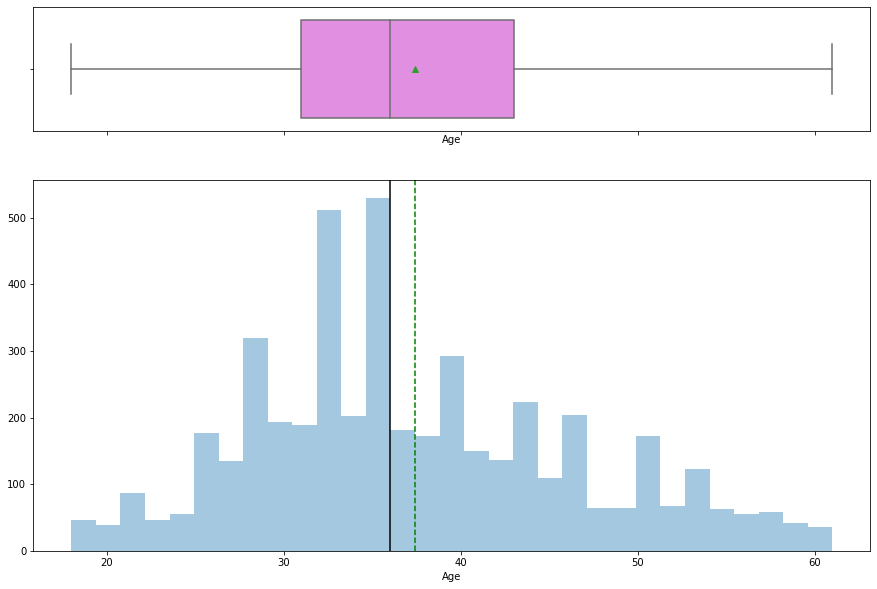

In [39]:
#Age
histogram_boxplot(dataTourism['Age'])

- From the boxplot, there are no outliers
- Mean > Median, which shows a slightly right skewed data
- More data points are below Age 40

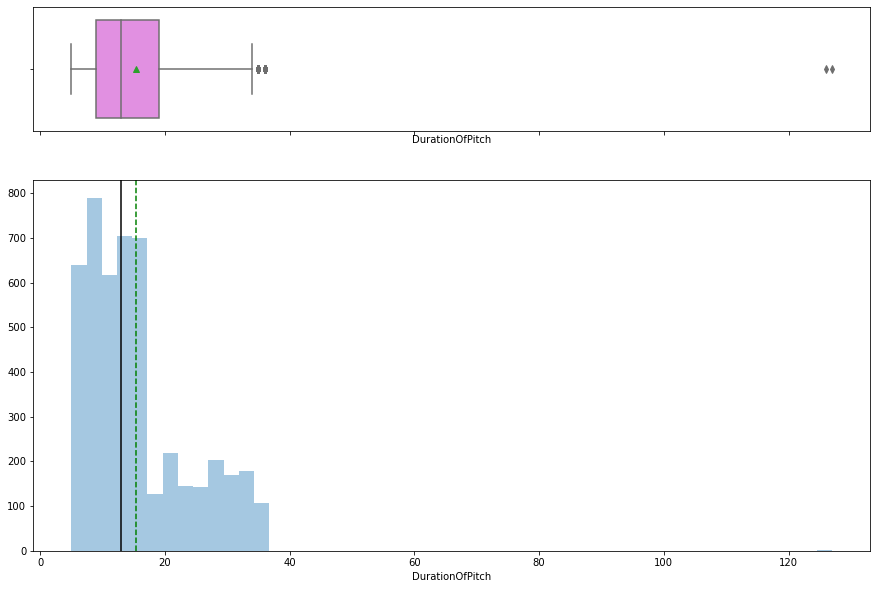

In [40]:
#DurationOfPitch
histogram_boxplot(dataTourism['DurationOfPitch'])

- From boxplot, there seems to be outliers towards the right end
- Most data points are below 20, there seems to be no or min data points after 40
- Right skewed distribution

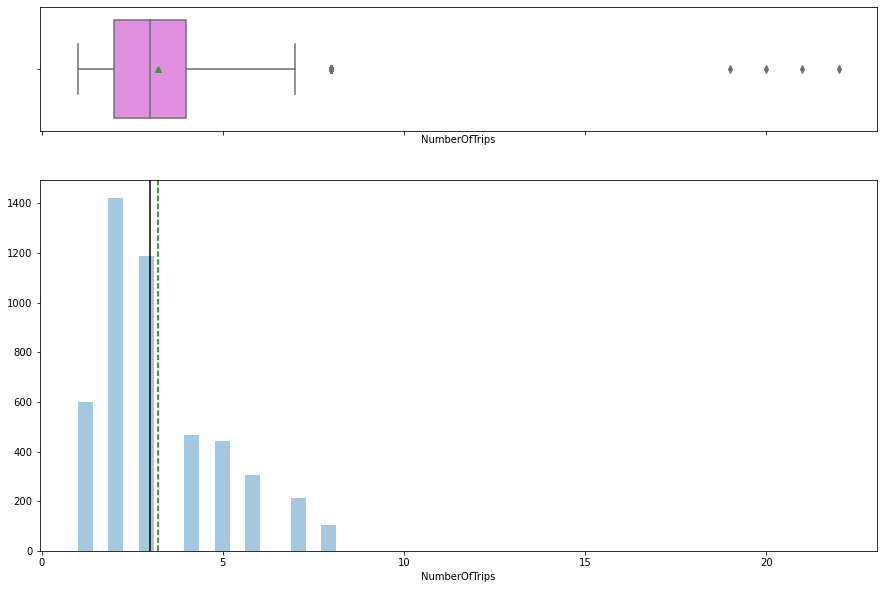

In [41]:
#NumberOfTrips
histogram_boxplot(dataTourism['NumberOfTrips'])

- From boxplot, there seems to be outliers towards the right end
- Most data points are below 5, Right skewed distribution

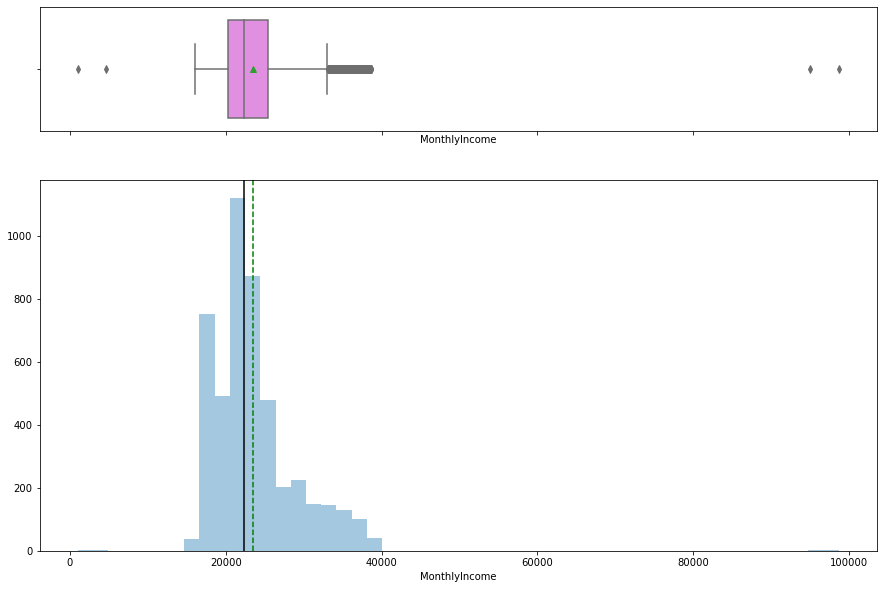

In [42]:
#MonthlyIncome
histogram_boxplot(dataTourism['MonthlyIncome'])

- From boxplot, there seems to be outliers towards both left end and right end
- Most data points are concentrated between 20,000 and 25,000
- Right skewed distribution

In [43]:
#Function to plot barchart with percentage for categorical variables

def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=dataTourism)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

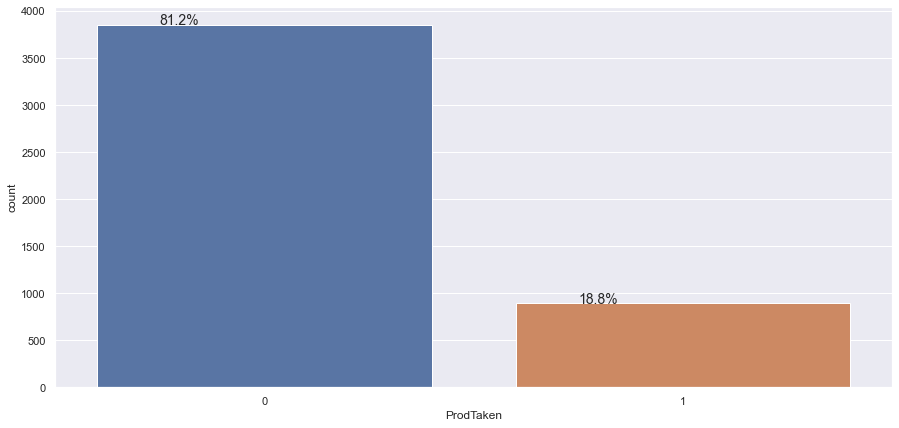

In [44]:
#ProdTaken
perc_on_bar(dataTourism['ProdTaken'])

- 81% of the customers did not take the product offered
- Clear inbalance between the two categories of target variabe

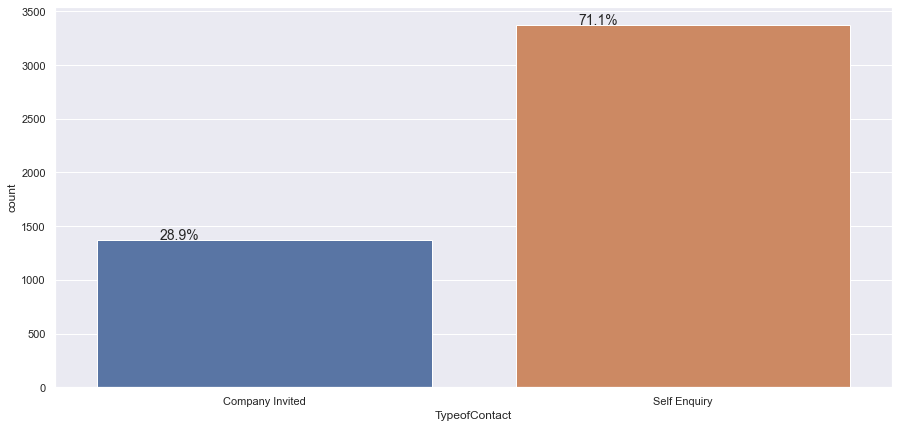

In [45]:
#TypeofContact
perc_on_bar(dataTourism['TypeofContact'])

- 71% 'Self Enquiry' observations and only 29% 'Company Invited' data points

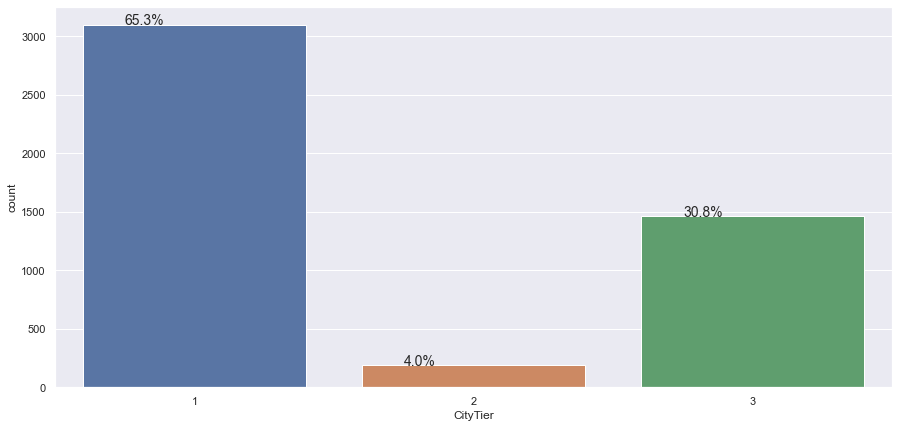

In [46]:
#CityTier
perc_on_bar(dataTourism['CityTier'])

- Number of observations for City Tier = 1 is way more than the other two
- Only 4% observations in City Tier = 2

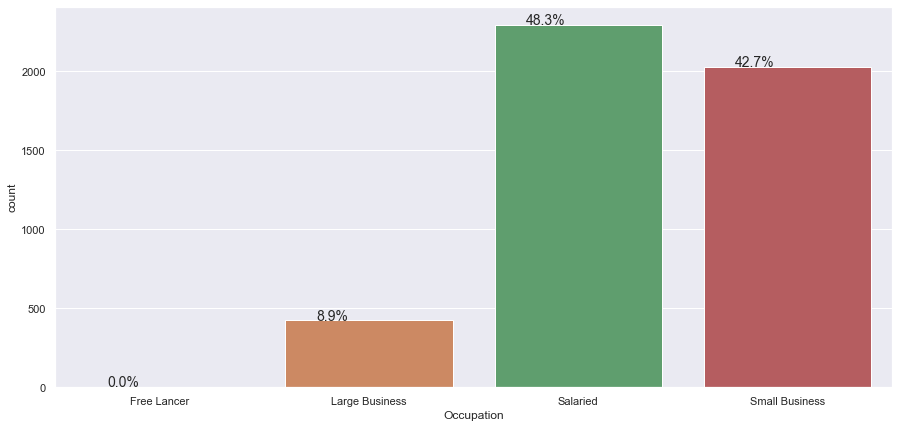

In [47]:
#Occupation
perc_on_bar(dataTourism['Occupation'])

- Number of observations for Salaried and Small Business more (48% and 42%)
- Free Lancer has only 2 observations in the dataset (we saw in value counts), which is showing almost 0%

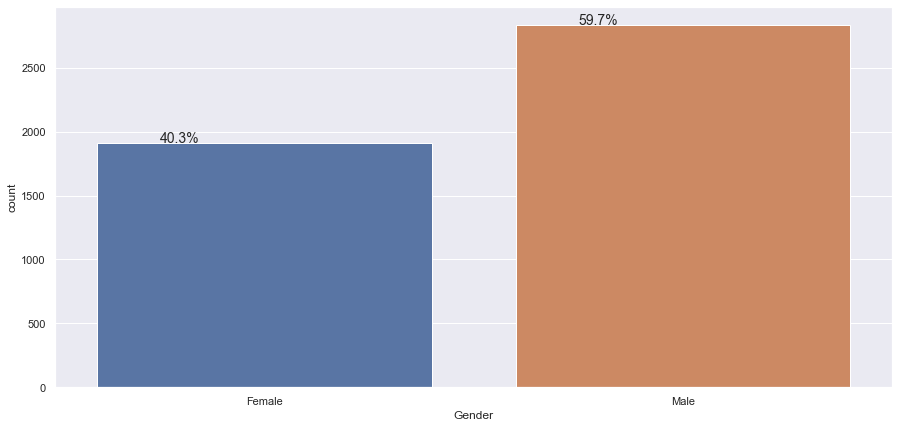

In [48]:
#Gender
perc_on_bar(dataTourism['Gender'])

- Number of observations for Male is more than Female

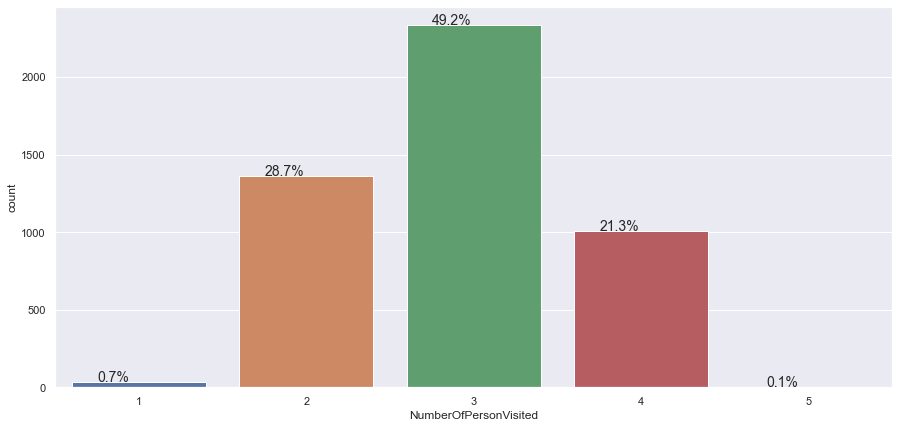

In [49]:
#NumberOfPersonVisited
perc_on_bar(dataTourism['NumberOfPersonVisited'])

- Number of data points more for NumberOfPersonVisited = 3 category, followed by NumberOfPersonVisited = 2

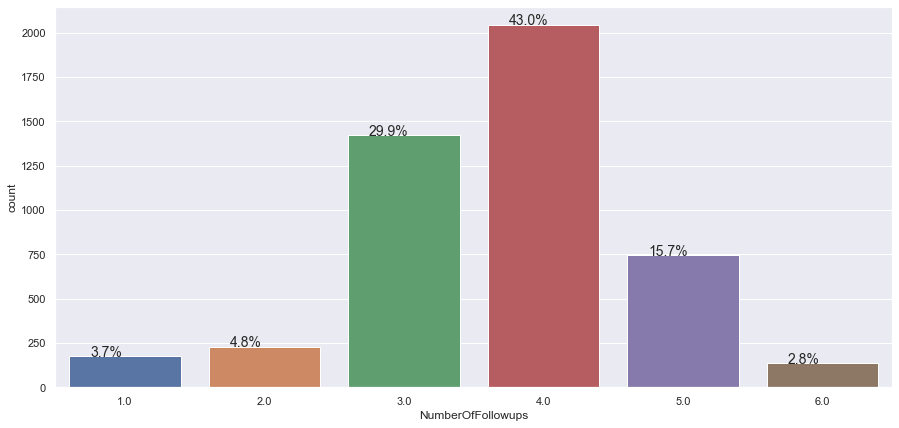

In [50]:
#NumberOfFollowups
perc_on_bar(dataTourism['NumberOfFollowups'])

- Number of data points more for NumberOfFollowups = 4 category, followed by NumberOfFollowups = 3
- Sales team is good at following up with customers

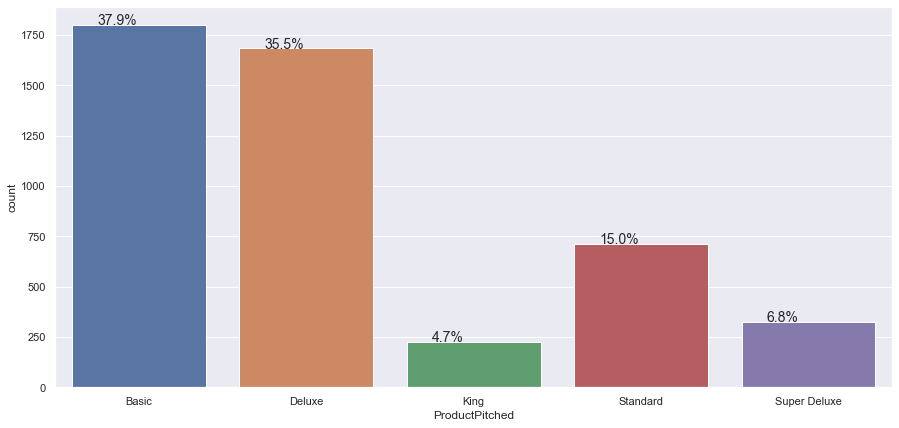

In [51]:
#ProductPitched
perc_on_bar(dataTourism['ProductPitched'])

- Number of observations more for Basic and Deluxe products and lowest for King

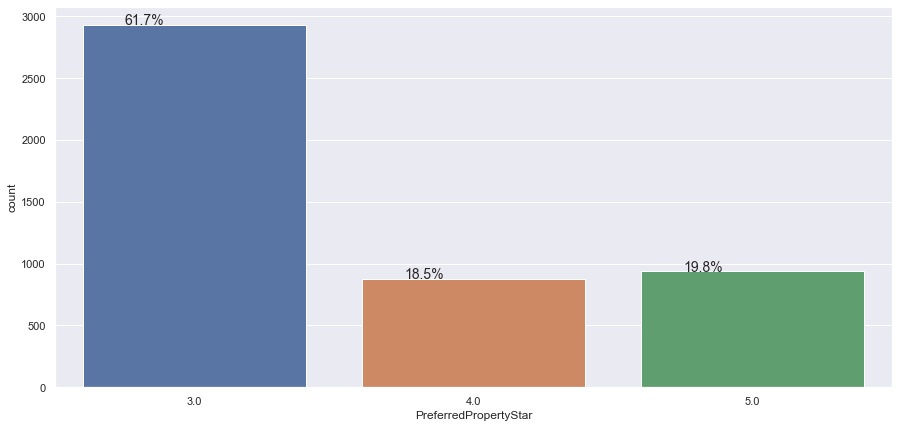

In [52]:
#PreferredPropertyStar
perc_on_bar(dataTourism['PreferredPropertyStar'])

- Observations more for hotel rating 3 star, more customers in the dataset rated '3'

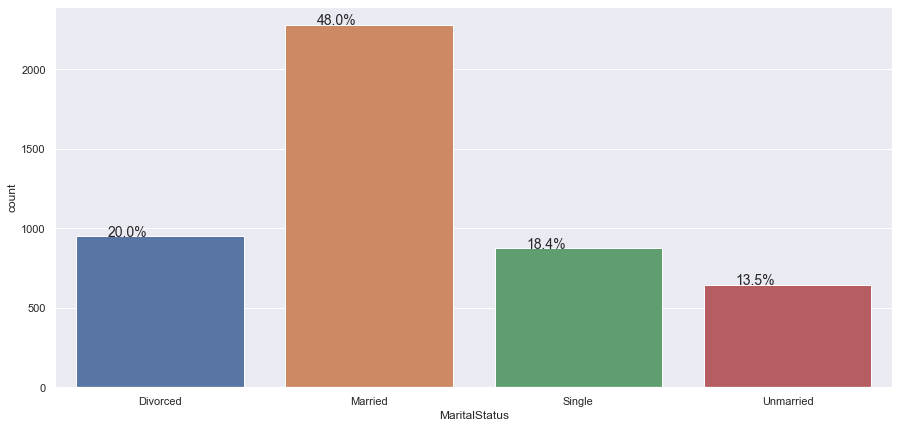

In [53]:
#MaritalStatus
perc_on_bar(dataTourism['MaritalStatus'])

- Number of observations more for Married

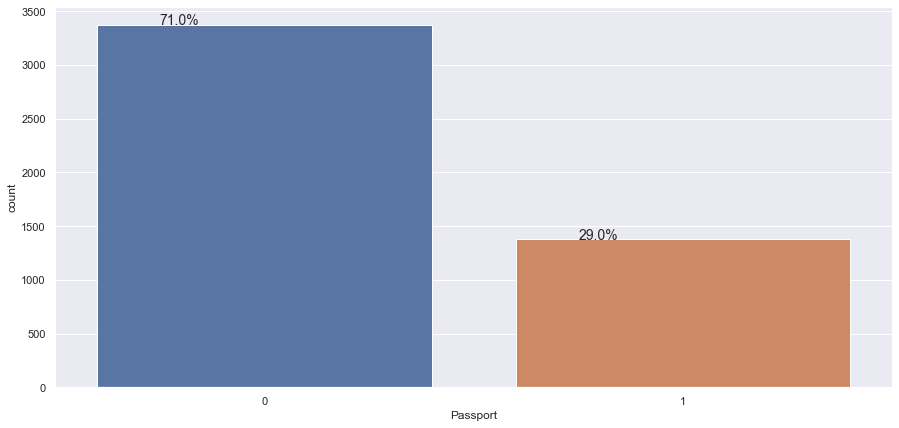

In [54]:
#Passport
perc_on_bar(dataTourism['Passport'])

- Passport flag '0' has more data points than '1' (more customers in this dataset without passport)

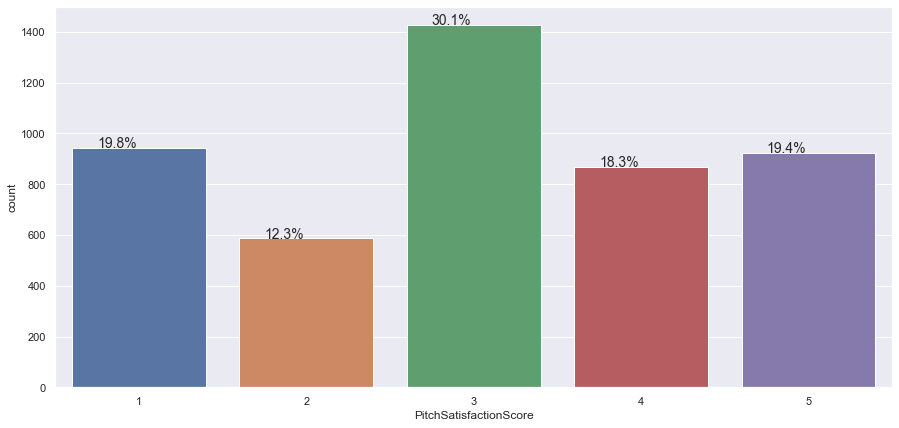

In [55]:
#PitchSatisfactionScore
perc_on_bar(dataTourism['PitchSatisfactionScore'])

- Satisfaction Score '3' has more data points, then '1' and '5'

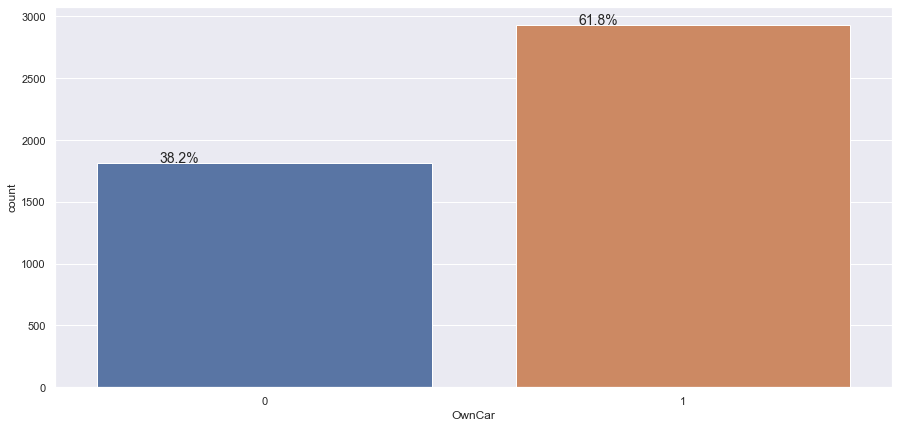

In [56]:
#OwnCar
perc_on_bar(dataTourism['OwnCar'])

- Number of observations more for customers with own car

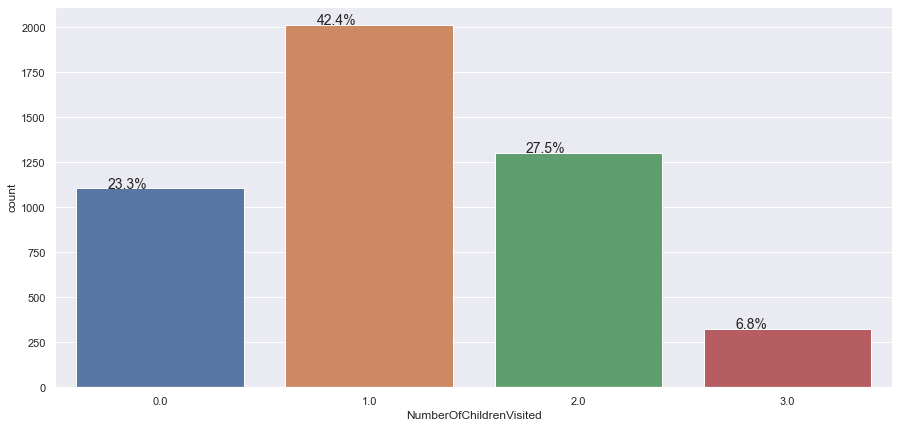

In [57]:
#NumberOfChildrenVisited
perc_on_bar(dataTourism['NumberOfChildrenVisited'])

- Number of observations more for customers visited with one child

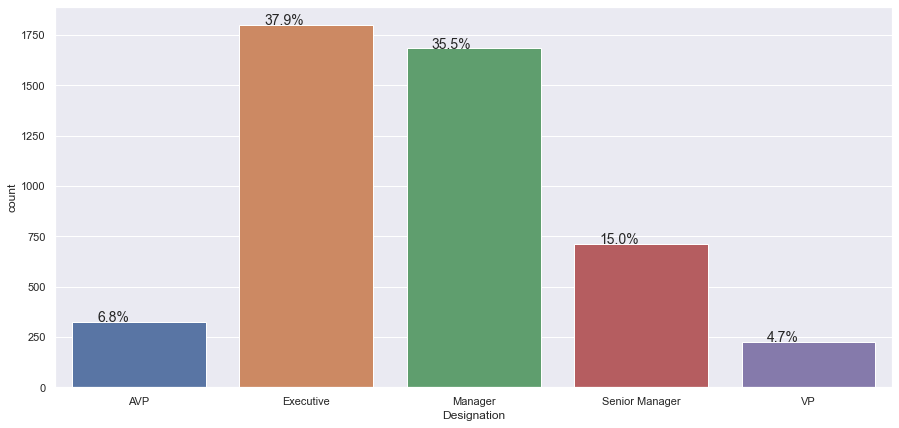

In [58]:
#Designation
perc_on_bar(dataTourism['Designation'])

- Number of observations more for Executives and Managers

#### EDA - Bivariate Analysis

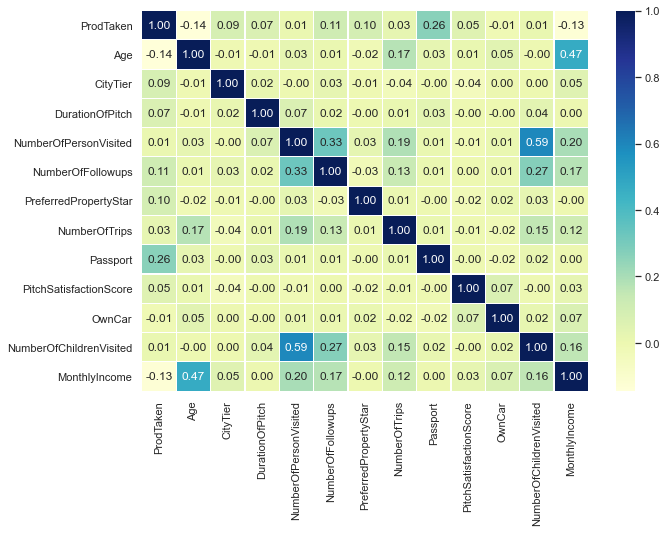

In [59]:
#Heatmap to visualize the relationship between variables
fig, ax = plt.subplots(figsize=(10,7));
sns.heatmap(dataTourism.corr(),annot=True,linewidths=0.1,cmap='YlGnBu',fmt='.2f');

- The target variable 'ProdTaken' shows some correlation with Passport flag,Number of followups and Preferred property star,     but not any strong correlation visible here
- It also has some -ve correlation with Age and Monthly income
- Age shows good correlation with MonthlyIncome
- NumberOfPersonVisited has good correlation with NumberOfChildrenVisited, also shows some correlation with NumberOfFollowups     and MonthlyIncome

In [60]:
#Bivariate Analysis - let us look at how target variable (ProdTaken) is distributed amongst continuous variables
dataTourism[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome','ProdTaken']].groupby(['ProdTaken']).mean()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
ProdTaken,,,,
0,38.035297,15.087205,3.202440,23840.710000
1,34.645414,16.646532,3.329978,22088.816187


In [61]:
dataTourism[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome','ProdTaken']].groupby(['ProdTaken']).median()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
ProdTaken,,,,
0,36.0,13.0,3.0,22659.487678
1,32.0,14.0,3.0,21114.500000


- When we see the mean and median of continuos variables with respect to the target variable, we can see that there is no major difference between the two categories ProdTaken = 1 and ProdTaken = 0
- It could be becuase these variables are not impacting the customer to choose a product or not, we will analyze further and see the feature importance after building the model to arrive at a final conclusion

In [62]:
#Bivariate Analysis - let us look at how target variable (ProdTaken) is distributed amongst categorical variables
pd.crosstab(dataTourism['TypeofContact'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
TypeofContact,,
Company Invited,0.785714,0.214286
Self Enquiry,0.822222,0.177778


- Out of 100 customers who are 'Company Invited' 21 accepted product offering, whereas out of 100 customers who did 'Self Enquiry' only 17 accepted product offering

In [63]:
pd.crosstab(dataTourism['CityTier'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
CityTier,,
1,0.836669,0.163331
2,0.776596,0.223404
3,0.763176,0.236824


- Even though number of observations are more for City Tier '1' (from univariate analysis), customers in city tier '3' and '2' have a higher chance of buying the product offered

In [64]:
pd.crosstab(dataTourism['Occupation'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
Occupation,,
Free Lancer,0.000000,1.000000
Large Business,0.721698,0.278302
Salaried,0.825556,0.174444
Small Business,0.815582,0.184418


- Even though number of observations are more for Salaried and Small Business, Large Business customers have a higher chance of accepting the product
- There are only 2 observations for Free Lancer and both ended up taking the product

In [65]:
pd.crosstab(dataTourism['Gender'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
Gender,,
Female,0.826360,0.173640
Male,0.801764,0.198236


- Looks like Gender is not impacting the target variable much (% of customers accepting product slightly more for Male)

In [66]:
pd.crosstab(dataTourism['NumberOfPersonVisited'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
NumberOfPersonVisited,,
1,1.000000,0.000000
2,0.812317,0.187683
3,0.808647,0.191353
4,0.810704,0.189296
5,1.000000,0.000000


- Customers visited in 2,3,4 person groups have higher chance of accepting product offering. 

In [67]:
pd.crosstab(dataTourism['NumberOfFollowups'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
NumberOfFollowups,,
1.0,0.885714,0.114286
2.0,0.894737,0.105263
3.0,0.835327,0.164673
4.0,0.816446,0.183554
5.0,0.747651,0.252349
6.0,0.607407,0.392593


- Number of follow ups seem to impact the target variable, more followups result in the customer deciding to choose the product offered

In [68]:
pd.crosstab(dataTourism['ProductPitched'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
ProductPitched,,
Basic,0.700000,0.300000
Deluxe,0.882423,0.117577
King,0.911111,0.088889
Standard,0.831933,0.168067
Super Deluxe,0.950617,0.049383


- Looks like Basic,Standard and Deluxe are the products customers selected more

In [69]:
pd.crosstab(dataTourism['PreferredPropertyStar'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
PreferredPropertyStar,,
3.0,0.837598,0.162402
4.0,0.799544,0.200456
5.0,0.742004,0.257996


- Customers who accepted product offering seem to like 4 star and 5 star rated hotels

In [70]:
pd.crosstab(dataTourism['MaritalStatus'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
MaritalStatus,,
Divorced,0.869474,0.130526
Married,0.862220,0.137780
Single,0.660571,0.339429
Unmarried,0.752722,0.247278


- % of customers who accepted product offering seem to be more from single and unmarried category, even though married customer count is high in the dataset

In [71]:
pd.crosstab(dataTourism['Passport'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
Passport,,
0,0.877224,0.122776
1,0.650909,0.349091


- % of customers who accepted product offering seem to be have passport, even though count is high in the dataset for customers without passport

In [72]:
pd.crosstab(dataTourism['PitchSatisfactionScore'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
PitchSatisfactionScore,,
1,0.847134,0.152866
2,0.849829,0.150171
3,0.786966,0.213034
4,0.815880,0.184120
5,0.785482,0.214518


- Looks like more satisfied customers tend to choose product offering (not a huge difference though)

In [73]:
pd.crosstab(dataTourism['OwnCar'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
OwnCar,,
0,0.806061,0.193939
1,0.815143,0.184857


- Does not seem to impact the target variable much

In [74]:
pd.crosstab(dataTourism['NumberOfChildrenVisited'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
NumberOfChildrenVisited,,
0.0,0.818100,0.181900
1.0,0.811817,0.188183
2.0,0.809816,0.190184
3.0,0.796296,0.203704


- Does not seem to impact the target variable much (almost equally distributed)

In [75]:
pd.crosstab(dataTourism['Designation'],dataTourism['ProdTaken'],normalize='index')

ProdTaken,0,1
Designation,,
AVP,0.950617,0.049383
Executive,0.700000,0.300000
Manager,0.882423,0.117577
Senior Manager,0.831933,0.168067
VP,0.911111,0.088889


- Executives,managers and senior managers accepted product offerings more, compared to VPs and AVPs

#### ProdTaken Vs Age,DurationOfPitch,NumberOfTrips,MonthlyIncome 

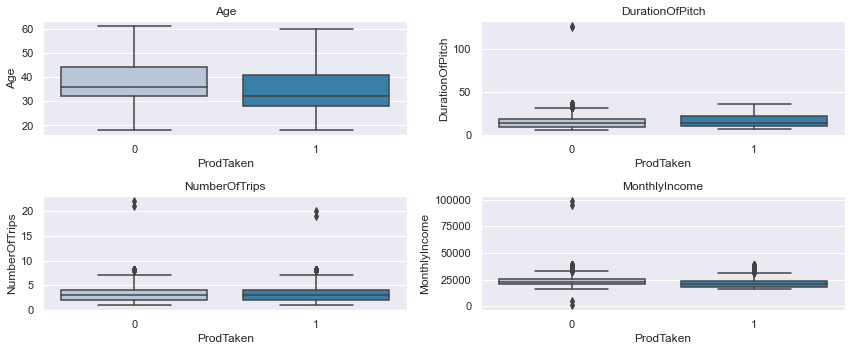

In [76]:
#Bivariate plot for numeric variables and target variable
cols = dataTourism[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(dataTourism['ProdTaken'],dataTourism[variable],palette='PuBu')
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

With outliers, it is difficult to make an interpretation from the graphs above, so removing outliers (for visualization not from orignal data) to get a better understanding

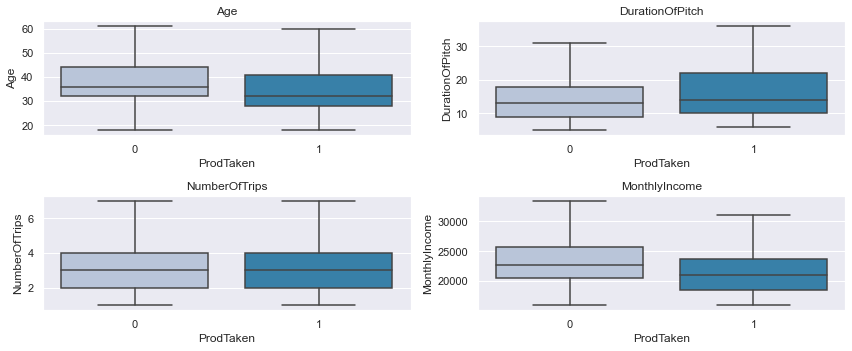

In [77]:
cols = dataTourism[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(dataTourism["ProdTaken"],dataTourism[variable],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- If we consider customers who accepted product offering, their avg Age is smaller compared to customers who did not accept       products
- Duration of pitch (time spent by salesman to explain customers about the products) seems to have an impact on the target       variable. When the duration is more, more customers tend to accept the product
- Number of trips does not seem to have much impact on the product acceptance
- Product acceptance seems to be slightly higher for customers with little lower Monthly Income (could be because more Managers   and executives took products compared to VP and AVP)

In [78]:
#Function to get count plot with hue, that shows % among each class
#Shows crosstab again for better readability and to show % within class and different classes altogether
def perc_on_bar_with_hue(x):
    tab1 = pd.crosstab(dataTourism[x],dataTourism['ProdTaken'],margins=True)
    print(tab1)
    print('-'*80)    
    df1 = dataTourism.groupby(x)['ProdTaken'].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue='ProdTaken',kind='bar',data=df1)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        #print(p)
        height = p.get_height()
        if np.isnan(height):
            height = 0
        txt = str(round(height,2)) + '%'
        txt_x = p.get_x() 
        txt_y = height
        g.ax.text(txt_x,txt_y,txt)

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1078  294  1372
Self Enquiry     2775  600  3375
All              3853  894  4747
--------------------------------------------------------------------------------


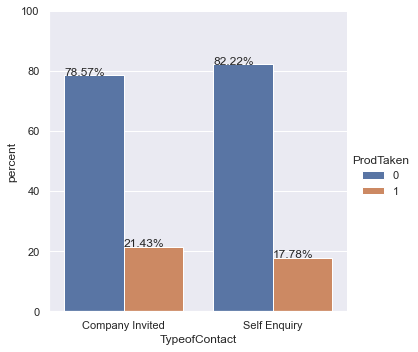

In [79]:
#TypeofContact Vs ProdTaken
perc_on_bar_with_hue('TypeofContact')

- Number of customers accepting product offering is more from Self Enquiry class
- When we consider % of customers accepting product offering within each class, the % is more for Company Invited - in other     words, out of 100 Company Invited customers 21 accepted product offering whereas out of 100 Self Enquired customers only 18     accepted product offering

ProdTaken     0    1   All
CityTier                  
1          2592  506  3098
2           146   42   188
3          1115  346  1461
All        3853  894  4747
--------------------------------------------------------------------------------


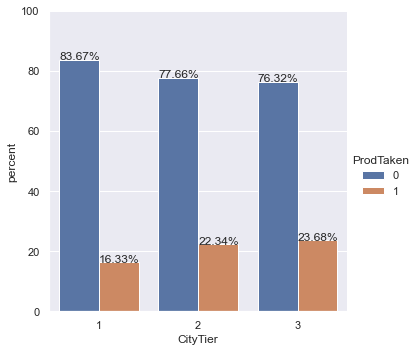

In [80]:
#CityTier Vs ProdTaken
perc_on_bar_with_hue('CityTier')

- Number of customers accepting product offering is more from City Tier '1'
- When we consider % of customers accepting product offering within each class, the % is more for City Tier '3'

ProdTaken     0    1   All
Gender                    
Female     1580  332  1912
Male       2273  562  2835
All        3853  894  4747
--------------------------------------------------------------------------------


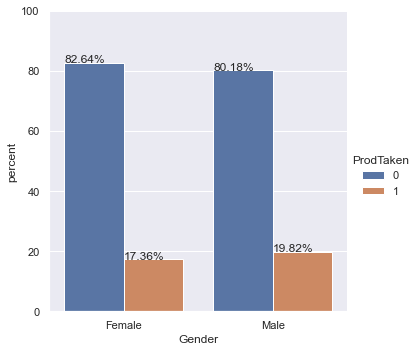

In [81]:
#Gender Vs ProdTaken
perc_on_bar_with_hue('Gender')

- Number of customers accepting product offering and % within group, both are bit high for Male (not a huge difference though)

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 155   20   175
2.0                 204   24   228
3.0                1187  234  1421
4.0                1668  375  2043
5.0                 557  188   745
6.0                  82   53   135
All                3853  894  4747
--------------------------------------------------------------------------------


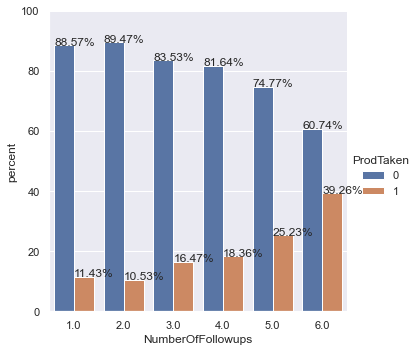

In [82]:
#NumberOfFollowups Vs ProdTaken
perc_on_bar_with_hue('NumberOfFollowups')

- More and more customers seem to accept product offering when the sales team do more follow ups

ProdTaken          0    1   All
ProductPitched                 
Basic           1260  540  1800
Deluxe          1486  198  1684
King             205   20   225
Standard         594  120   714
Super Deluxe     308   16   324
All             3853  894  4747
--------------------------------------------------------------------------------


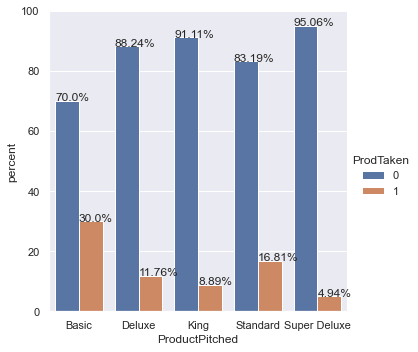

In [83]:
#ProductPitched Vs ProdTaken
perc_on_bar_with_hue('ProductPitched')

- Basic, Standard,Deluxe have more acceptance among customers
- King and Super Deluxe have very less acceptance among customers

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2455  476  2931
4.0                     702  176   878
5.0                     696  242   938
All                    3853  894  4747
--------------------------------------------------------------------------------


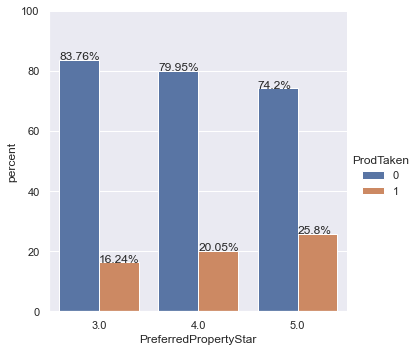

In [84]:
#PreferredPropertyStar Vs ProdTaken
perc_on_bar_with_hue('PreferredPropertyStar')

- Customers who rated 3 star, accepted more product offering
- When % is considered, out of 100 customers rated 5 star 26 accepted product offering whereas it is 20 for 4 star and 16 for 3   star

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        1965  314  2279
Single          578  297   875
Unmarried       484  159   643
All            3853  894  4747
--------------------------------------------------------------------------------


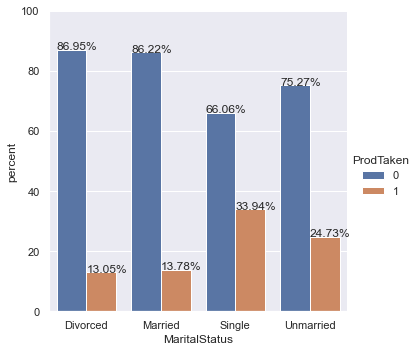

In [85]:
#MaritalStatus Vs ProdTaken
perc_on_bar_with_hue('MaritalStatus')

- Even though count of customers accepting product offering is high for Married class, % acceptance seems to be high for Single   and Unmarried 

ProdTaken     0    1   All
Passport                  
0          2958  414  3372
1           895  480  1375
All        3853  894  4747
--------------------------------------------------------------------------------


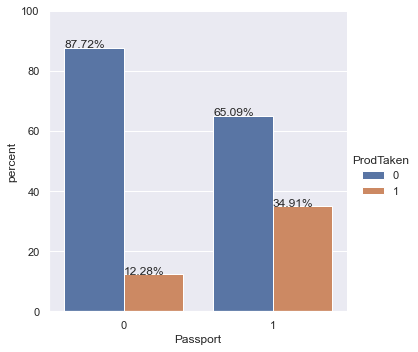

In [86]:
#Passport Vs ProdTaken
perc_on_bar_with_hue('Passport')

- % acceptance seems to be high among customers having passport

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1123  304  1427
4                        709  160   869
5                        725  198   923
All                     3853  894  4747
--------------------------------------------------------------------------------


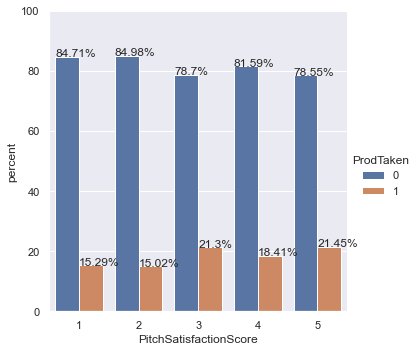

In [87]:
#PitchSatisfactionScore Vs ProdTaken
perc_on_bar_with_hue('PitchSatisfactionScore')

- % acceptance seems to be high among customers providing satisfaction score 5,3 and 4

ProdTaken     0    1   All
OwnCar                    
0          1463  352  1815
1          2390  542  2932
All        3853  894  4747
--------------------------------------------------------------------------------


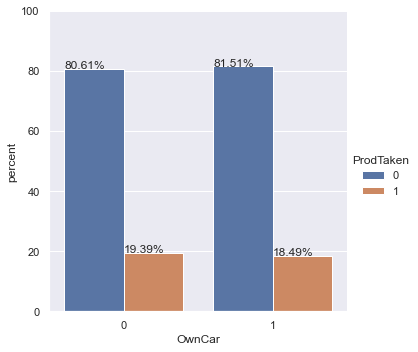

In [88]:
#OwnCar Vs ProdTaken
perc_on_bar_with_hue('OwnCar')

- Even though count of customers accepting product offering is high for those who own a car, % acceptance seems to be high for   customers who do not own cars

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
0.0                       904  201  1105
1.0                      1635  379  2014
2.0                      1056  248  1304
3.0                       258   66   324
All                      3853  894  4747
--------------------------------------------------------------------------------


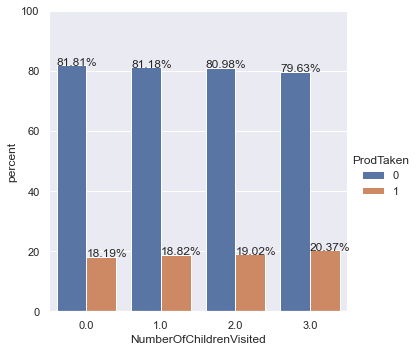

In [89]:
#NumberOfChildrenVisited Vs ProdTaken
perc_on_bar_with_hue('NumberOfChildrenVisited')

- Even though count of customers accepting product offering is high for those who came with 1 or 2 kids, % acceptance seems to   be high for customers who came with 3 kids

ProdTaken          0    1   All
Designation                    
AVP              308   16   324
Executive       1260  540  1800
Manager         1486  198  1684
Senior Manager   594  120   714
VP               205   20   225
All             3853  894  4747
--------------------------------------------------------------------------------


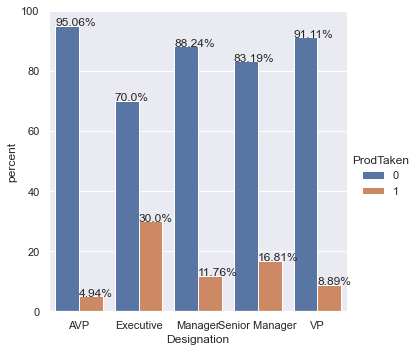

In [90]:
#Designation Vs ProdTaken
perc_on_bar_with_hue('Designation')

- Executives, Managers and Senior Managers seem to accept product offering more compared to VP and AVP

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   306  118   424
Salaried        1893  400  2293
Small Business  1654  374  2028
All             3853  894  4747
--------------------------------------------------------------------------------


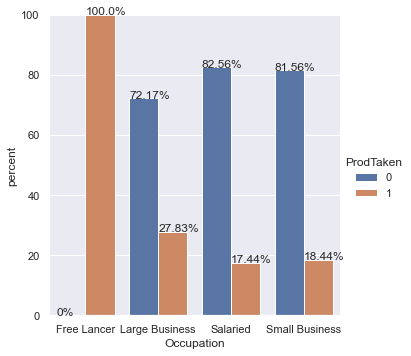

In [91]:
#Occupation Vs ProdTaken
perc_on_bar_with_hue('Occupation')

- Even though count of customers accepting product offering is high for Salaried and Small business, % acceptance seems to   be   high for customers with Large Business
- There are only 2 observations in Free Lancer, and both accepted the product offered

ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        35    0    35
2                      1108  256  1364
3                      1889  447  2336
4                       818  191  1009
5                         3    0     3
All                    3853  894  4747
--------------------------------------------------------------------------------


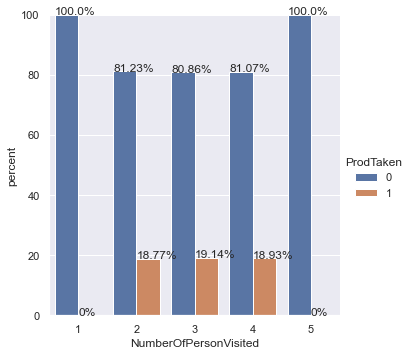

In [92]:
#NumberOfPersonVisited Vs ProdTaken
perc_on_bar_with_hue('NumberOfPersonVisited')

- 2,3 and 4 person groups are visiting more, single person visit and large groups visits are very less

#### Customer profile for different packages

In [93]:
#finding the mode for customer profile features of different packages
df = dataTourism[(dataTourism['ProdTaken'] == 1)]
df1 = df[['ProductPitched','Age','CityTier','Occupation','Gender','MaritalStatus','Passport','OwnCar','Designation','MonthlyIncome']]
df1.groupby(['ProductPitched']).agg(CityTier  = ('CityTier', \
                                        lambda x: x.value_counts().index[0]),
                                    Occupation  = ('Occupation', \
                                        lambda x: x.value_counts().index[0]),
                                    Gender  = ('Gender', \
                                        lambda x: x.value_counts().index[0]),
                                    MaritalStatus  = ('MaritalStatus', \
                                        lambda x: x.value_counts().index[0]),
                                    Passport  = ('Passport', \
                                        lambda x: x.value_counts().index[0]),
                                    OwnCar  = ('OwnCar', \
                                        lambda x: x.value_counts().index[0]),
                                    Designation  = ('Designation', \
                                        lambda x: x.value_counts().index[0]),                                    
                                        Avg_monthly_income = ('MonthlyIncome','mean'),
                                        Median_age = ('Age', 'median') \
                                      )

,CityTier,Occupation,Gender,MaritalStatus,Passport,OwnCar,Designation,Avg_monthly_income,Median_age
ProductPitched,,,,,,,,,
Basic,1,Salaried,Male,Single,1,1,Executive,20156.448670,30.0
Deluxe,3,Small Business,Male,Married,1,1,Manager,23082.017117,36.0
King,1,Small Business,Female,Single,1,1,VP,34672.100000,52.5
Standard,3,Small Business,Male,Married,0,1,Senior Manager,26016.433333,38.5
Super Deluxe,3,Salaried,Male,Single,1,1,AVP,29829.125000,42.0


#### Insights based on EDA

#### Key meaningful observations on the relationship between variables
- In terms of product acceptance %, 'Company Invited' customer pool has more chance of accepting a product offering than 'Self Enquiry' pool
- In terms of product acceptance %, customers from city tier 3 and 2 has more chance of accepting a product offering than customers from city tier 1
- Number of follow ups seem to have a direct influence on product acceptance, more follow ups result in more customers buying product offered
- Basic, Standard and Deluxe are the top 3 products that customers tend to buy more
- In terms of product acceptance %, customers rating hotels 5 and 4 tend to have more chance of accepting a product offering
- In terms of product acceptance %, single and unmarried customers  have more chance of accepting a product offering
- % product acceptance seems to be high among customers having passport
- % product acceptance seems to be high among customers with designation Executive and Manager
- In terms of product acceptance %, customers with 'Large Business' have  more chance of accepting a product offering

#### Data Pre-processing

- CustomerID column removed since that is just an ID column and not going to add value to the model
- Missing data present in columns                                           DurationOfPitch,MonthlyIncome,Age,NumberOfTrips,NumberOfChildrenVisited,NumberOfFollowups,PreferredPropertyStar and TypeofContact. This is handled in earlier steps
- Outliers are present in some of the columns like DurationOfPitch,NumberOfTrips,MonthlyIncome. Bagging and boosting algorithms are not sensitive to outliers and hence not trying to treat outliers
- Gender column had two values for Female (one could be typo), that is handled as well

In [94]:
#One hot encoding for string columns
oneHotCols=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

In [95]:
dataTourism=pd.get_dummies(dataTourism, columns=oneHotCols,drop_first=True)
dataTourism.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,32.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,0,0,0,1,0,0,0
5,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,...,0,0,0,0,1,0,1,0,0,0
6,0,59.0,1,9.0,2,2.0,5.0,5.0,1,2,...,0,0,0,0,0,0,1,0,0,0
7,0,30.0,1,30.0,3,3.0,3.0,2.0,0,2,...,0,0,0,1,0,0,1,0,0,0
8,0,38.0,1,29.0,2,4.0,3.0,1.0,0,3,...,0,1,0,0,0,1,0,0,1,0
9,0,36.0,1,33.0,3,3.0,3.0,7.0,0,3,...,0,0,0,0,0,0,0,1,0,0


In [96]:
dataTourism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4747 non-null   int64  
 1   Age                          4747 non-null   float64
 2   CityTier                     4747 non-null   int64  
 3   DurationOfPitch              4747 non-null   float64
 4   NumberOfPersonVisited        4747 non-null   int64  
 5   NumberOfFollowups            4747 non-null   float64
 6   PreferredPropertyStar        4747 non-null   float64
 7   NumberOfTrips                4747 non-null   float64
 8   Passport                     4747 non-null   int64  
 9   PitchSatisfactionScore       4747 non-null   int64  
 10  OwnCar                       4747 non-null   int64  
 11  NumberOfChildrenVisited      4747 non-null   float64
 12  MonthlyIncome                4747 non-null   float64
 13  TypeofContact_Self

#### Model building - Bagging

In [97]:
#Keep column names in a variable for future use
column_names = list(dataTourism.columns)
column_names.remove('ProdTaken')                    
feature_names = column_names
print(feature_names)

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


In [98]:
#Split data
X = dataTourism.drop('ProdTaken',axis=1)                                                 
y = dataTourism['ProdTaken'].astype('category')  

In [99]:
# Splitting data into training and test set
#stratify=y preserves the ratio b/w ProdTaken=1 and ProdTaken=0 in test and train
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3322, 28) (1425, 28)


In [100]:
#Function to display confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_model_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

#### Model performance evaluation - right metric to use

- From the objective, the company wants to expand their customer base by adding new customers. So not being able to identify a   potential customer is loss for the company. Recall is the right metric to evaluate model performance in this scenario.

- Also as per the problem statement ("company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient"), the company wants to make the marketing expenditure efficient. So  targeting a wrong customer which in turn cost more marketing expenditure need to be given importance too. Precision is the right metric to evaluate model performance in this scenario.

- So we will use both precision and recall scores to decide on the best model

#### Build Decision Tree

- Target variable ProdTaken has 81% data with class '0' and 19% with class '1'. So class '0' will become the dominant class and the decision tree will become biased toward the dominant class

- Hence using class_weight {0:0.19,1:0.81} for the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [102]:
#Building model using the DecisionTreeClassifier function. Using default 'gini' criteria to split
dTree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [103]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

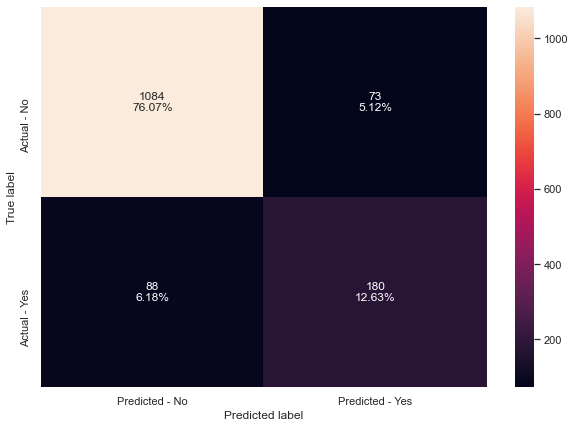

In [104]:
make_confusion_matrix(dTree,y_test)

### Insights:

- **True Positives:**
    - Reality: A customer accepted the travel package.
    - Model predicted: The customer will accept the travel package.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT accept the travel package.
    - Model predicted: The customer will NOT accept the travel package.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT accept the travel package.
    - Model predicted: The customer will accept the travel package.
    - Outcome: Marketing team which is targeting the potential customers will be wasting their resources on the people/customers who will not be accepting the travel package.

- **False Negatives:**
    - Reality: A customer accepted the travel package.
    - Model predicted: The customer will NOT accept the travel package.
    - Outcome: The potential customer is missed by the sales/marketing team, the team wants to expand the customer base, which is impacted by the model.

- As already mentioned above, we need to consider both precision and recall while choosing the right model, since the company is looking into expand their customer base and trying to make marketing cost effective.

In [105]:
dtree_score = get_model_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8870175438596491
Recall on training set :  1.0
Recall on test set :  0.6716417910447762
Precision on training set :  1.0
Precision on test set :  0.7114624505928854


- There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

#### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

In [106]:
# Choose the type of classifier. 
dTree_tuned = DecisionTreeClassifier(random_state=1,class_weight = {0: 0.19, 1: 0.81})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['gini'],
            'splitter': ['best'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001]
            #'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=9,
                       min_impurity_decrease=1e-06, random_state=1)

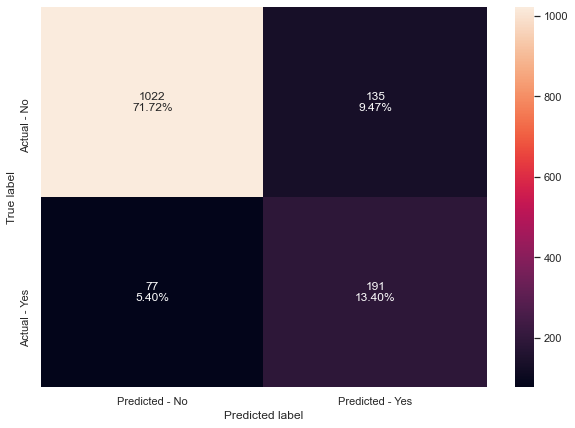

In [107]:
make_confusion_matrix(dTree_tuned,y_test)

In [108]:
dtree_tuned_score = get_model_score(dTree_tuned)

Accuracy on training set :  0.9063816977724263
Accuracy on test set :  0.8512280701754386
Recall on training set :  0.8674121405750799
Recall on test set :  0.7126865671641791
Precision on training set :  0.7042801556420234
Precision on test set :  0.5858895705521472


- Over fitting has reduced (more general model), but precision dropped on training and test, recall training dropped but improved bit on test set
- From the recall score, the model is 71% accurate in predicting potential customers on test set

#### Feature importance from Decision Tree

In [109]:
print(pd.DataFrame(dTree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.141130
DurationOfPitch              0.128247
Age                          0.123418
MonthlyIncome                0.114128
Designation_Executive        0.090539
CityTier                     0.063558
NumberOfFollowups            0.060068
NumberOfTrips                0.059824
PreferredPropertyStar        0.049534
PitchSatisfactionScore       0.039644
MaritalStatus_Married        0.034698
Occupation_Large Business    0.026007
Designation_Senior Manager   0.011018
Gender_Male                  0.007899
ProductPitched_Deluxe        0.007402
MaritalStatus_Single         0.007133
ProductPitched_Super Deluxe  0.006085
ProductPitched_Standard      0.005394
OwnCar                       0.005232
NumberOfChildrenVisited      0.004832
MaritalStatus_Unmarried      0.004529
NumberOfPersonVisited        0.004232
Occupation_Small Business    0.002039
TypeofContact_Self Enquiry   0.001903
Designation_Manager          0.001109
Occupation_S

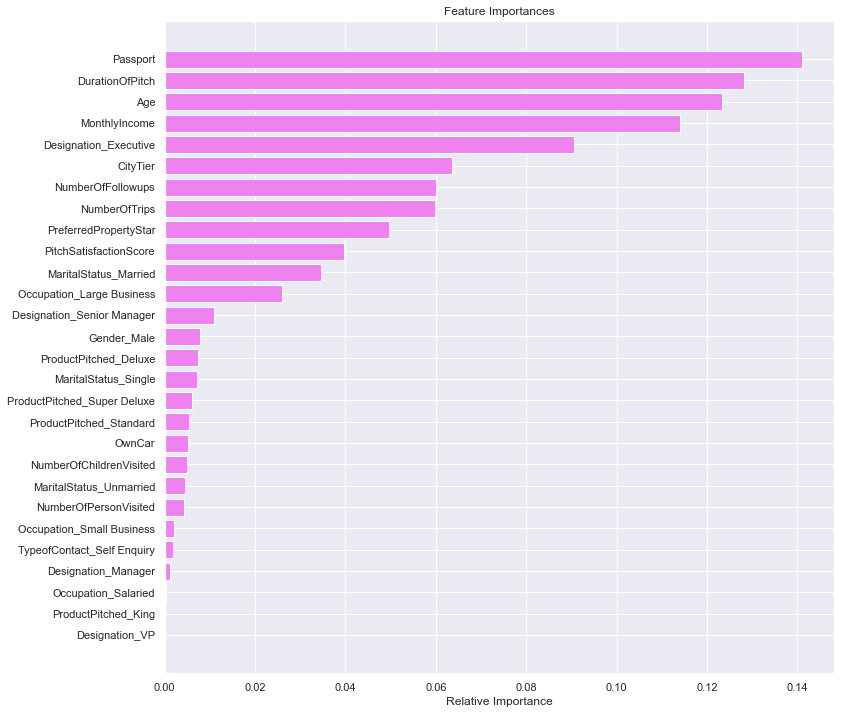

In [110]:
importances = dTree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport Flag, DurationOfPitch and Age are the top 3 features for tuned decision tree model

#### Model performance evaluation and improvement

- Decision tree classifier with default parameters is over-fitting
- Decision tree classifier with hyperparameter tuning is more generalized, but precision can be improved on testing set
- Considering recall and precision values, even decision tree with hyperparameter tuning is not giving good results for precison
- Model is 71% accurate in predicting potential customers, but only 58% accurate in terms of making marketing expenditure effective

#### Random Forest classifier

In [111]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

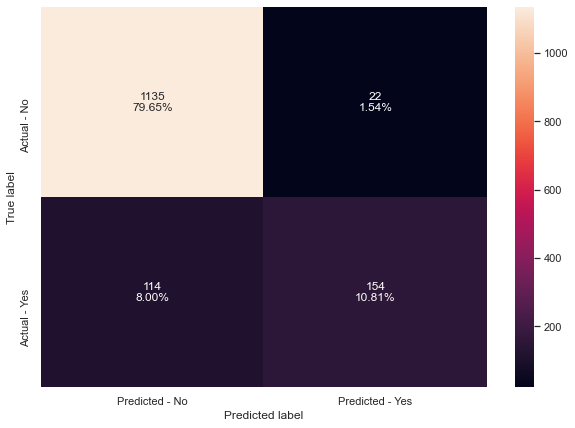

In [112]:
make_confusion_matrix(rf_estimator,y_test)

In [113]:
rf_estimator_score=get_model_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9045614035087719
Recall on training set :  1.0
Recall on test set :  0.5746268656716418
Precision on training set :  1.0
Precision on test set :  0.875


- Random forest with default parameters is over-fitting, even though Precision and Accuracy have improved on test set compared to decision tree model
- Recall on test set decreased compared to decision tree model

#### Hyperparameter tuning

In [114]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                "class_weight": [{0:0.19,1:0.81}],
                "n_estimators": [150,200,250],
                "min_samples_leaf": np.arange(5, 10),
                "max_features": np.arange(0.2, 0.7, 0.1),
                "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81},
                       max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=9,
                       n_estimators=250, random_state=1)

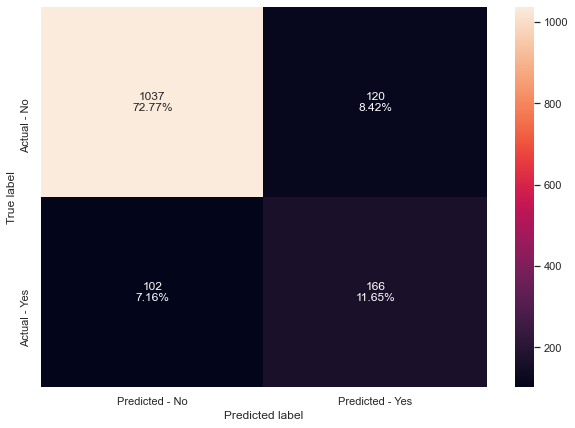

In [115]:
make_confusion_matrix(rf_tuned,y_test)

In [116]:
rf_tuned_score=get_model_score(rf_tuned)

Accuracy on training set :  0.9036724864539434
Accuracy on test set :  0.8442105263157895
Recall on training set :  0.8402555910543131
Recall on test set :  0.6194029850746269
Precision on training set :  0.7050938337801609
Precision on test set :  0.5804195804195804


- Model is more generalized
- Accuracy and Recall gives comparatively better results on train and test set, but precision score is not good on test set
- The model can be improved to get better precision score

#### Model performance evaluation and improvement

- Random Forest classifier with default parameters is over-fitting
- Random Forest classifier with hyperparameter tuning is more generalized, but precision can be improved on testing set
- Considering both recall and precision values, even Random Forest with hyperparameter tuning is not giving good results
- The model is 61% effective in identifying new customers and 58% effective in terms of marketing expenditure 

#### Feature Importance from Random Forest Classifier

In [117]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.150620
Age                          0.117885
DurationOfPitch              0.103299
MonthlyIncome                0.103050
Designation_Executive        0.087386
CityTier                     0.054950
PreferredPropertyStar        0.043851
NumberOfFollowups            0.043256
PitchSatisfactionScore       0.041870
NumberOfTrips                0.036486
MaritalStatus_Single         0.035170
MaritalStatus_Married        0.024889
Gender_Male                  0.015660
Designation_Manager          0.014664
Occupation_Large Business    0.014176
Occupation_Salaried          0.011926
NumberOfPersonVisited        0.011843
TypeofContact_Self Enquiry   0.011726
Occupation_Small Business    0.011630
ProductPitched_Deluxe        0.011191
MaritalStatus_Unmarried      0.011031
OwnCar                       0.010944
NumberOfChildrenVisited      0.010695
ProductPitched_Standard      0.008503
Designation_Senior Manager   0.007480
ProductPitch

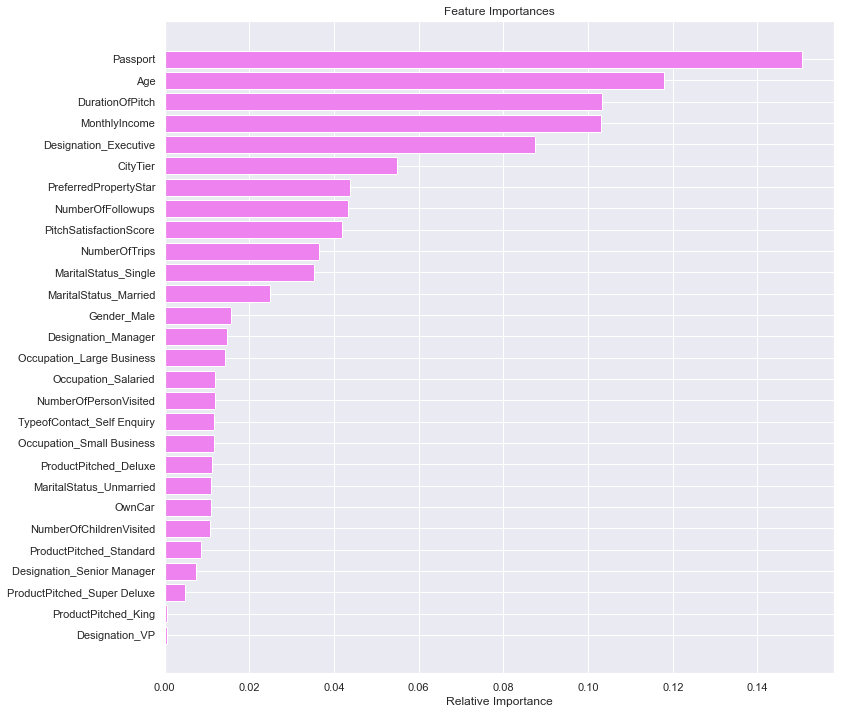

In [118]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport, Age and DurationOfPitch are top 3 features for tuned Random Forest Classifier

#### Bagging Classifier

In [119]:
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

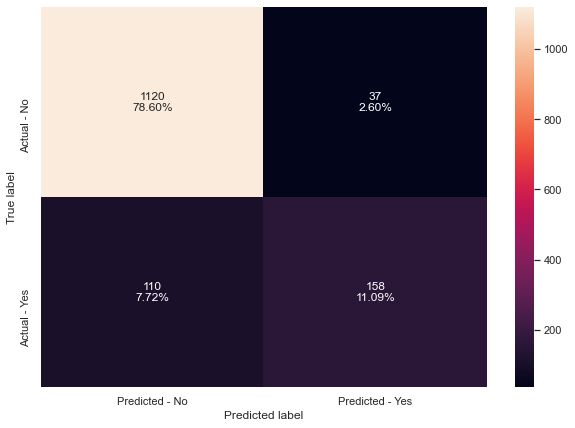

In [120]:
make_confusion_matrix(bagging_estimator,y_test)

In [121]:
bagging_estimator_score = get_model_score(bagging_estimator)

Accuracy on training set :  0.9948826008428657
Accuracy on test set :  0.8968421052631579
Recall on training set :  0.9728434504792333
Recall on test set :  0.5895522388059702
Precision on training set :  1.0
Precision on test set :  0.8102564102564103


- Recall still shows low on test data and slight over-fitting on training set

#### Hyperparameter tuning

In [122]:
# Choose the type of classifier. 
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

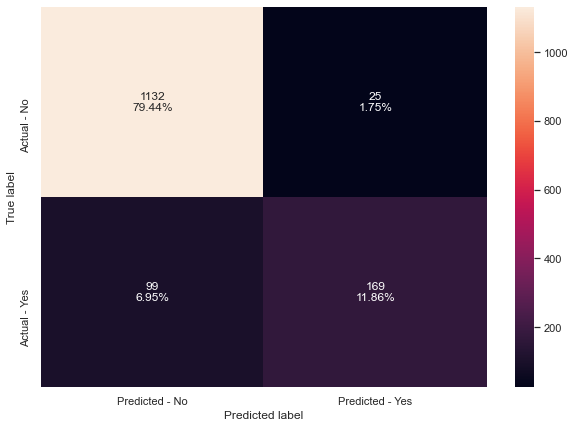

In [123]:
make_confusion_matrix(bagging_tuned,y_test)

In [124]:
bagging_tuned_score=get_model_score(bagging_tuned)

Accuracy on training set :  0.9993979530403372
Accuracy on test set :  0.9129824561403509
Recall on training set :  0.9968051118210862
Recall on test set :  0.6305970149253731
Precision on training set :  1.0
Precision on test set :  0.8711340206185567


- Looks like there is slight over-fitting on training set, even though recall and precision slightly improved
- Bagging classifier has ***no feature importance*** attribute

#### Model performance evaluation and improvement

- Both Bagging classifier with default parameters and tuned Bagging classifier are slightly over-fitting on training set
- Tuned model gives better precision, but recall can be improved
- The tuned model is 63% effective in identifying new customers and 87% effective in terms of marketing expenditure

#### Model building - Boosting

#### Adaboost Classifier

In [125]:
ab_estimator=AdaBoostClassifier(random_state=1)
ab_estimator.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

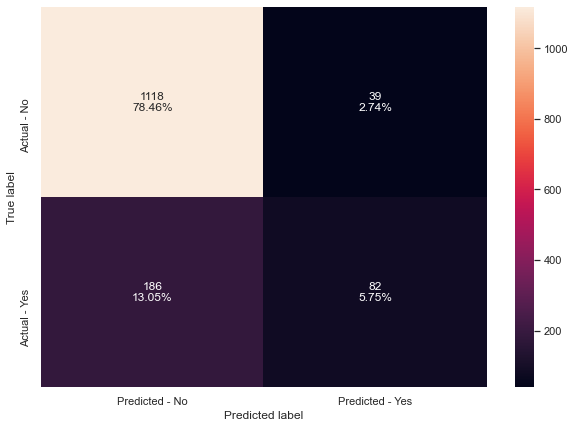

In [126]:
make_confusion_matrix(ab_estimator,y_test)

In [127]:
ab_estimator_score=get_model_score(ab_estimator)

Accuracy on training set :  0.8509933774834437
Accuracy on test set :  0.8421052631578947
Recall on training set :  0.34345047923322686
Recall on test set :  0.30597014925373134
Precision on training set :  0.7190635451505016
Precision on test set :  0.6776859504132231


- AdaBoost is generalizing well but it is giving poor performance, in terms of recall, as compared to decision tree and random forest model.

#### Hyperparameter Tuning

In [128]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
                "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
                "n_estimators": np.arange(10,110,10),
                "learning_rate":np.arange(0.1,2,0.1)
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.4000000000000001, n_estimators=100,
                   random_state=1)

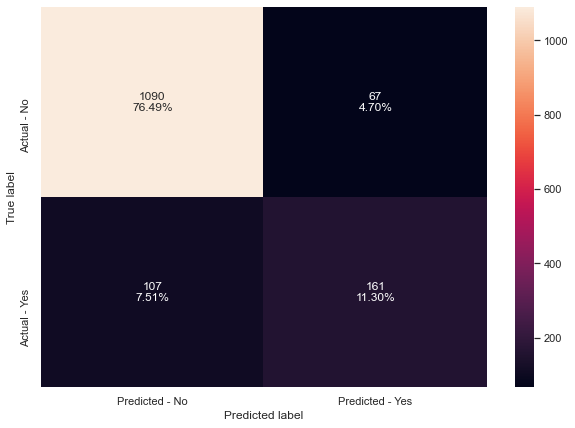

In [129]:
make_confusion_matrix(ab_tuned,y_test)

In [130]:
ab_tuned_score=get_model_score(ab_tuned)

Accuracy on training set :  0.9918723660445514
Accuracy on test set :  0.8778947368421053
Recall on training set :  0.963258785942492
Recall on test set :  0.6007462686567164
Precision on training set :  0.9934102141680395
Precision on test set :  0.706140350877193


- We can see that there is significant improvement in the model after hyperparameter tuning.

#### Feature Importance from Adaboost Classifier

In [131]:
print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.245811
Age                          0.159264
DurationOfPitch              0.132712
NumberOfTrips                0.059490
PitchSatisfactionScore       0.047247
NumberOfFollowups            0.043756
PreferredPropertyStar        0.038668
Passport                     0.034568
NumberOfPersonVisited        0.029918
CityTier                     0.021281
Occupation_Large Business    0.016987
TypeofContact_Self Enquiry   0.016303
NumberOfChildrenVisited      0.015597
Occupation_Small Business    0.015591
MaritalStatus_Single         0.015162
Designation_Executive        0.014926
MaritalStatus_Unmarried      0.013004
OwnCar                       0.012528
Gender_Male                  0.012224
ProductPitched_Super Deluxe  0.010121
Occupation_Salaried          0.009622
Designation_Senior Manager   0.008787
MaritalStatus_Married        0.007526
ProductPitched_Deluxe        0.006725
Designation_Manager          0.005677
ProductPitch

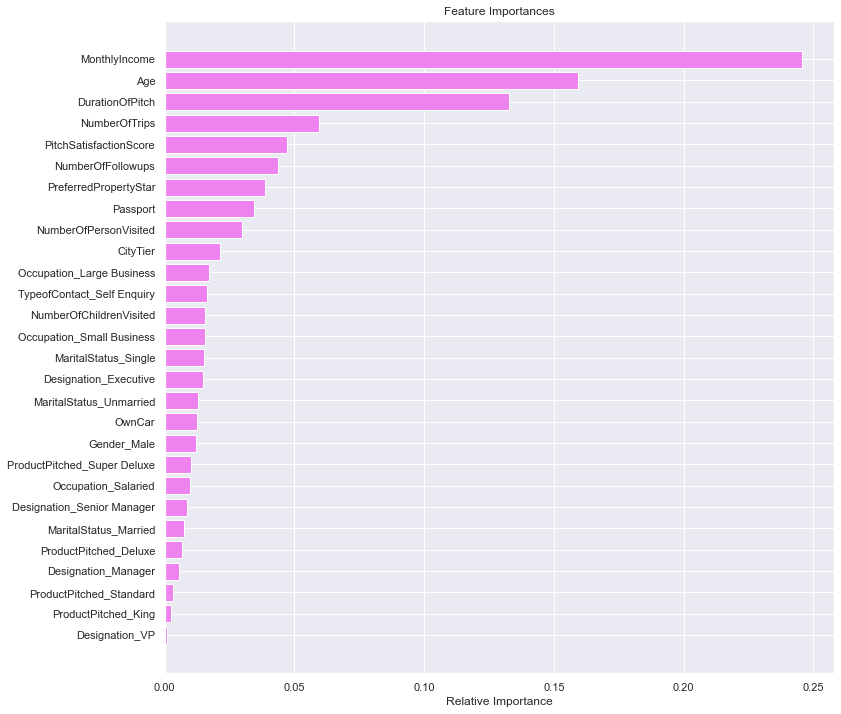

In [132]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income, Age, DurationOfPitch are top 3 features for tuned Adaboost classifier

#### Model performance evaluation and improvement

- Adaboost classifier with default parameters and tuned adaboost classifier are both generalized (not over-fitting)
- Tuned model gives better precision and recall scores
- The tuned model is 60% effective in identifying new customers and 70% effective in terms of marketing expenditure on test set

#### Gradient Boost Classifier

In [133]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

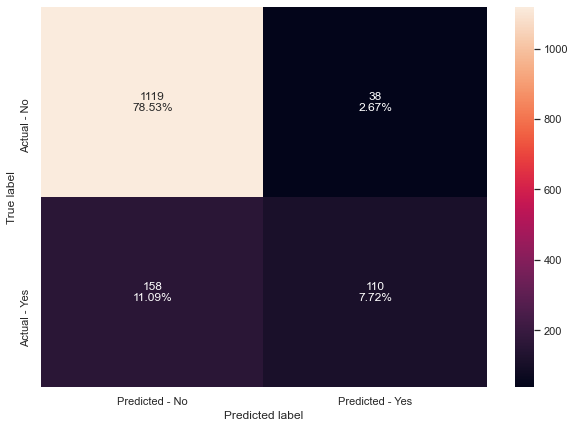

In [134]:
make_confusion_matrix(gb_estimator,y_test)

In [135]:
gb_estimator_score=get_model_score(gb_estimator)

Accuracy on training set :  0.8922335942203492
Accuracy on test set :  0.8624561403508771
Recall on training set :  0.5015974440894568
Recall on test set :  0.41044776119402987
Precision on training set :  0.8722222222222222
Precision on test set :  0.7432432432432432


- Model generalizing well, Recall and Precision improved compared to Adaboost, but recall scores are low

#### Hyperparameter Tuning

In [136]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1]
              #'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=175, random_state=1,
                           subsample=0.7)

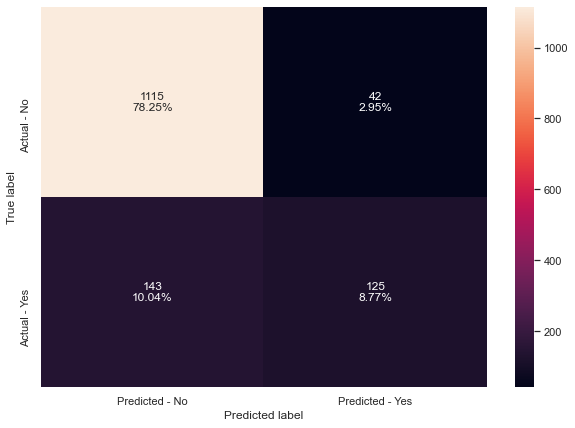

In [137]:
make_confusion_matrix(gb_tuned,y_test)

In [138]:
gb_tuned_score=get_model_score(gb_tuned)

Accuracy on training set :  0.9136062612883805
Accuracy on test set :  0.8701754385964913
Recall on training set :  0.6022364217252396
Recall on test set :  0.4664179104477612
Precision on training set :  0.908433734939759
Precision on test set :  0.7485029940119761


- The model is not over-fitting, but recall on testing data is low

#### Feature Importance from Gradient Boost Classifier

In [139]:
print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.150762
Age                          0.133972
Passport                     0.124698
Designation_Executive        0.096200
DurationOfPitch              0.087068
NumberOfFollowups            0.067989
CityTier                     0.053725
NumberOfTrips                0.046290
MaritalStatus_Single         0.044595
PitchSatisfactionScore       0.041439
PreferredPropertyStar        0.036225
Occupation_Large Business    0.020755
MaritalStatus_Unmarried      0.015751
Gender_Male                  0.010865
MaritalStatus_Married        0.010096
Designation_Senior Manager   0.008998
ProductPitched_Standard      0.007652
TypeofContact_Self Enquiry   0.006932
NumberOfPersonVisited        0.006399
Occupation_Small Business    0.005812
Designation_Manager          0.005316
ProductPitched_Super Deluxe  0.004850
ProductPitched_Deluxe        0.003895
OwnCar                       0.003148
Occupation_Salaried          0.002842
NumberOfChil

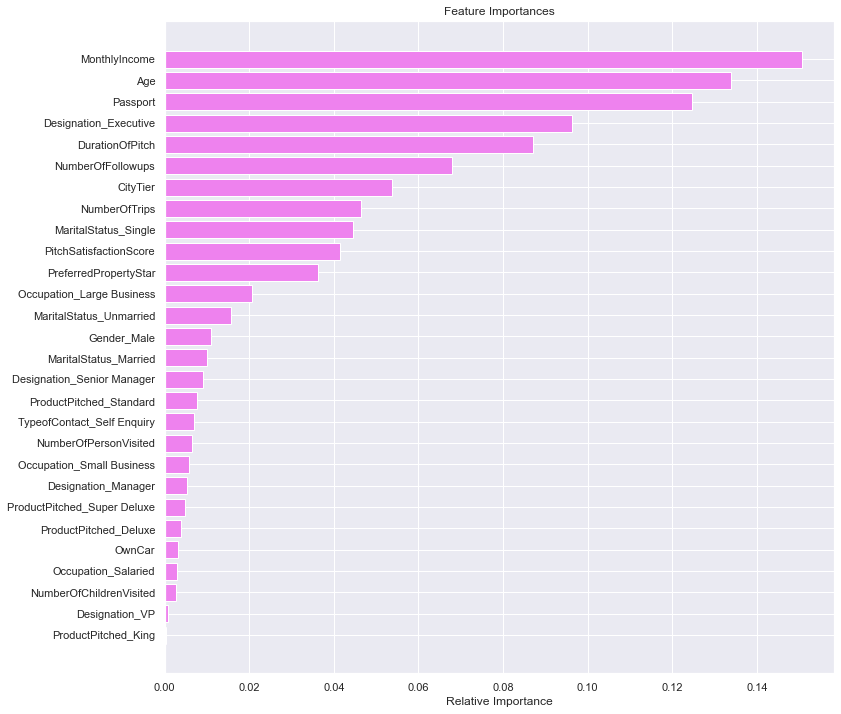

In [140]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income, Age and Passport are top 3 features from tuned Gradient Boost Classifier

#### Model performance evaluation and improvement

- Gradient boost classifier with default parameters and tuned model are both generalized (not over-fitting)
- Tuned model gives better precision scores, but recall can be improved
- The tuned model is only 46% effective in identifying new customers, but 74% effective in terms of marketing expenditure on test set

#### XGBoost Classifier

In [141]:
xgb_estimator=XGBClassifier(random_state=1,eval_metric='logloss')
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

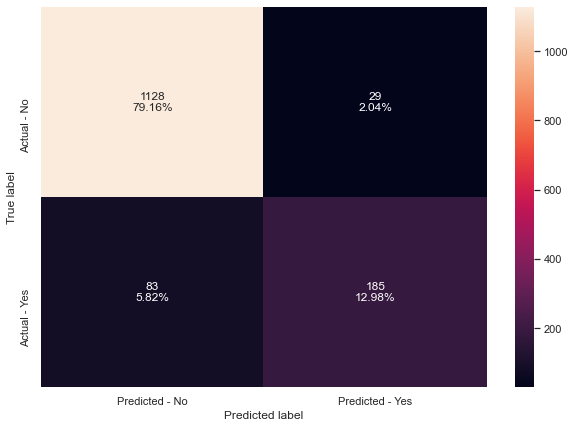

In [142]:
make_confusion_matrix(xgb_estimator,y_test)

In [143]:
xgb_estimator_score=get_model_score(xgb_estimator)

Accuracy on training set :  0.9996989765201686
Accuracy on test set :  0.9214035087719298
Recall on training set :  0.9984025559105432
Recall on test set :  0.6902985074626866
Precision on training set :  1.0
Precision on test set :  0.8644859813084113


- XGBoost default does better job, except for over-fitting on training set in terms of precision

#### Hyperparameter Tuning

In [144]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'learning_rate':[0.01,0.1,0.2,0.05],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1],
              'scale_pos_weight':[3,4,5]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

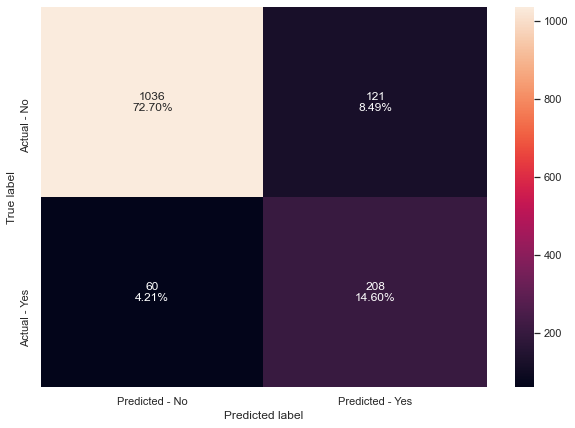

In [145]:
make_confusion_matrix(xgb_tuned,y_test)

In [146]:
xgb_tuned_score=get_model_score(xgb_tuned)

Accuracy on training set :  0.9403973509933775
Accuracy on test set :  0.8729824561403509
Recall on training set :  0.9664536741214057
Recall on test set :  0.7761194029850746
Precision on training set :  0.7736572890025576
Precision on test set :  0.6322188449848024


- Model is generalizing on training and testing set
- It shows comparatively good accuracy, recall and precision scores 

#### Feature Importance from XGBoost Classifier

In [155]:
print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.131450
Designation_Executive        0.068939
MaritalStatus_Single         0.055983
Occupation_Large Business    0.038375
Designation_Manager          0.038374
CityTier                     0.038117
PreferredPropertyStar        0.037655
MaritalStatus_Married        0.037064
ProductPitched_Deluxe        0.035562
ProductPitched_Standard      0.034978
NumberOfFollowups            0.032734
Age                          0.032442
MonthlyIncome                0.030837
DurationOfPitch              0.030349
MaritalStatus_Unmarried      0.030260
Designation_Senior Manager   0.030228
PitchSatisfactionScore       0.028988
Occupation_Salaried          0.028106
ProductPitched_Super Deluxe  0.028062
TypeofContact_Self Enquiry   0.026653
NumberOfTrips                0.025909
OwnCar                       0.025249
Occupation_Small Business    0.024923
ProductPitched_King          0.024817
Gender_Male                  0.022988
Designation_

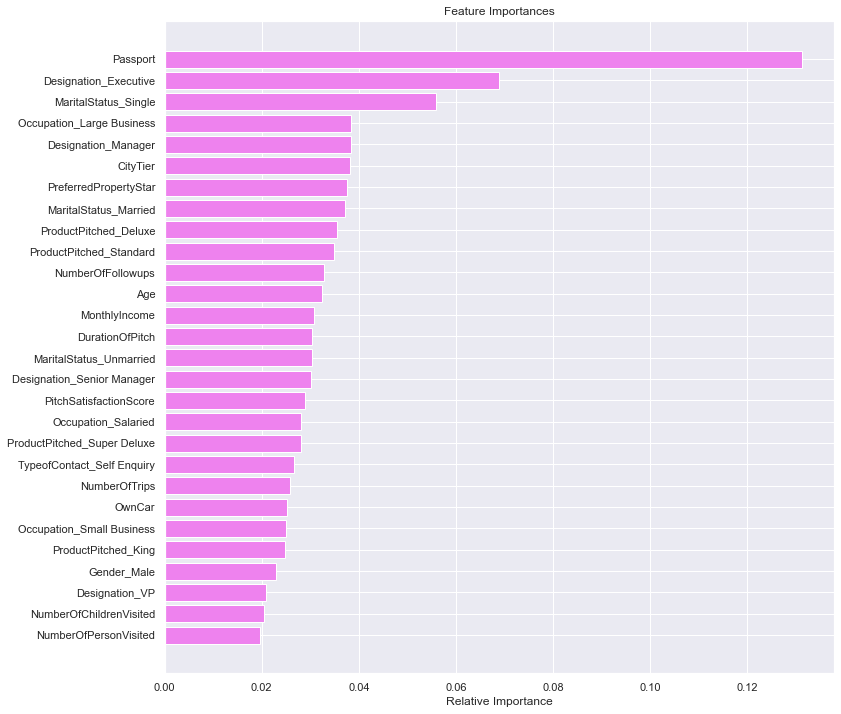

In [156]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport, Designation_Executive and MaritalStatus_Single are top 3 features from tuned XGBoost classifier

#### Model performance evaluation and improvement

- XGBoost classifier with default parameters is slightly over-fitting
- XGBoost classifier with hyperparameter tuning is more generalized, but precision can be improved on testing set
- The model is 77% effective in identifying new customers and 63% effective in terms of marketing expenditure

#### Stacking Classifier

Building a stacking classifier model with the tuned models - decision tree, random forest, bagging classifier,adaboost and gradient boosting, then use XGBoost to get the final prediction.

In [157]:
estimators=[('Decision Tree', dTree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned),
           ('Adaboost',ab_tuned),
           ('Bagging Classifier',bagging_tuned)]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss')

In [158]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=9,
                                                       min_impurity_decrease=1e-06,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_features=0.5000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=9,
                                                       n_estimators=250,
               

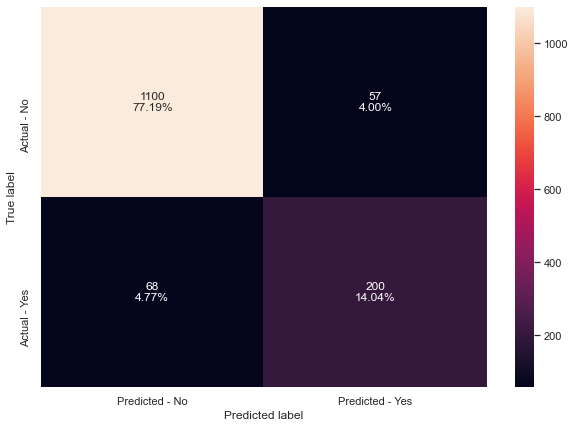

In [159]:
make_confusion_matrix(stacking_estimator,y_test)

In [160]:
stacking_estimator_score=get_model_score(stacking_estimator)

Accuracy on training set :  0.9972907886815171
Accuracy on test set :  0.9122807017543859
Recall on training set :  0.9952076677316294
Recall on test set :  0.746268656716418
Precision on training set :  0.9904610492845787
Precision on test set :  0.7782101167315175


- Model is well generalized and gives good results for all 3 scores - accuracy,recall and precision

#### Comparing all models

In [161]:
# defining list of models
models = [dTree, dTree_tuned, rf_estimator, rf_tuned, bagging_estimator,bagging_tuned,ab_estimator, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train= []
recall_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    #print(model)
    j = get_model_score(model,False)
    accuracy_train.append(j[0])
    accuracy_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [162]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Tuned Bagging Classifier','AdaBoost Classifier', 'Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier','Stacking Classifier'], 
                                          'Train_accuracy': accuracy_train,'Test_accuracy': accuracy_test,
                                          'Train_recall':recall_train,'Test_recall':recall_test,
                                          'Train_precision':precision_train,'Test_precision':precision_test}) 
comparison_frame

,Model,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision
0,Decision Tree,1.000000,0.887018,1.000000,0.671642,1.000000,0.711462
1,Tuned Decision Tree,0.906382,0.851228,0.867412,0.712687,0.704280,0.585890
2,Random Forest,1.000000,0.904561,1.000000,0.574627,1.000000,0.875000
3,Tuned Random Forest,0.903672,0.844211,0.840256,0.619403,0.705094,0.580420
4,Bagging Classifier,0.994883,0.896842,0.972843,0.589552,1.000000,0.810256
5,Tuned Bagging Classifier,0.999398,0.912982,0.996805,0.630597,1.000000,0.871134
6,AdaBoost Classifier,0.850993,0.842105,0.343450,0.305970,0.719064,0.677686
7,Tuned AdaBoost Classifier,0.991872,0.877895,0.963259,0.600746,0.993410,0.706140
8,Gradient Boosting Classifier,0.892234,0.862456,0.501597,0.410448,0.872222,0.743243
9,Tuned Gradient Boosting Classifier,0.913606,0.870175,0.602236,0.466418,0.908434,0.748503


- Models that do not over-fit on training and test set are tuned decision tree, tuned random forest, adaboost, tuned adaboost, gradient boost, tuned gradient boost,xgboost tuned and stacking classifier

- In terms of recall and precision, stacking classifier and xgboost tuned are good models

- Tuned decision tree is also good considering both recall and precision

#### Business Recommendations

- This model can be used to predict if a customer is going to accept a product offering, provided the customer profile is going to be the same. This can also be extended to new products, since the features analysed in the model are mostly customer related and not product specific. Tourism sector company can make use of this model to expand their customer base and there is some insight towards effective use of the marketing expenditure.

- Sales team can focus more on these features - Passport Flag, DurationOfPitch, Age, Monthly Income, Designation and Marital Status

- Since 'company invited' customers tend to accept product offering more, sales/marketing team can contact more customers based on the customer profile study from the model
- Sales/marketing team can focus on customers from city tier 3 and 2
- Sales/marketing team can make sure that they do proper follow up with customers, since that increases the product acceptance rate
- Customers can be offered Basic, Standard or Deluxe packages more. When a new package is introduced in the market, it can inherit some of the features from these existing packages
- Sales/marketing team can focus more on single and unmarried customers to expand customer base
- Sales/marketing team can focus more on customers with passport (could be customers who travel more or are from different countries)
- Executive and manager level customers can be contacted more, since they tend to accept packages more
- Also large business customers can be contacted more, since they tend to accept packages more
- Company can give some discounts for customers from city tier 1, marital status other than single/unmarried, domestic customers, customers with higher designations (VP/AVP etc), salaried/small business customers to get more customers from these categories for their packages
- Since there is 100% product acceptance rate for Free Lancers, sales team can contact more of these customers, which could result in an increase in their customer base.